<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="liver.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Indian Liver Patient Prediction </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# DATA DEFINITION

**Age**: The actual age of the Patient.

**Gender** : Gender of the Patient. (Female, Male)

**Total Bilirubin**: Total bilirubin is a combination of direct and indirect bilirubin. Normal results for a total bilirubin test are 1.2 milligrams per deciliter (mg/dL) for adults and usually 1 mg/dL for those under 18.

**Direct Bilirubin**: In the liver, bilirubin is changed into a form that your body can get rid of. This is called conjugated bilirubin or direct bilirubin.Normal results for direct bilirubin are generally 0.3 mg/dL.

**Alkphos**: Alkaline phosphatase (ALP) is an enzyme in a person's blood that helps break down proteins.ALP results are reported in units per liter (U/L). For men and women older than age 18, an ALP level between 44 and 147 U/L is considered normal.

**Sgpt**: Alanine aminotransferase (ALT) is an enzyme found mostly in the cells of the liver and kidney.The normal value for ALT in blood ranges from 29 to 33 units per liter (IU/L) for males and 19 to 25 IU/L for females, but this value can vary depending on the hospital.

**Sgpot**: Aspartate aminotransferase (AST) is an enzyme found in cells throughout the body but mostly in the heart and liver and, to a lesser extent, in the kidneys and muscles. A normal ALT test result can range from 7 to 55 units per liter (U/L).

**Total Protein**: The total protein test measures the total amount of two classes of proteins found in the fluid portion of your blood. These are albumin and globulin.The normal range is 6.0 to 8.3 grams per deciliter (g/dL) or 60 to 83 g/L.

**Albumin**: Albumin is a protein made by your liver. Albumin helps keep fluid in your bloodstream so it doesn't leak into other tissues. The normal range is 3.4 to 5.4 g/dL.

**A/G Ratio**:  The albumin/globulin ratio is the amount of albumin in the serum divided by the globulins.Normal A/G ratio of slightly over 1.

**Selector**: Patient's affected by Liver Disease (1) and Patient's not affected by Liver Disease (0). (Target Variable)

## Table of Content

A. **[Problem Statement](#Problem_Statement)**

B. **[Import Libraries](#lib)**

C. **[Data Preparation](#prep)**
    - 1 - Read the Data
    - 2 - Check the Data Dimension
    - 3 - Check the Data Type
    - 4 - Summary Statistics
    - 5 - Missing Value Treatment
    - 6 - Outliers Treatment                                       
    - 7 - Dummy Encode the Categorical Variables
    - 8 - Distribution of Variables
    - 9 - Train-Test Split
    - 10- Imbalanced Data treatment
D. **[Model Building](#model)**
    - 1 - Logistic Regression
    - 2 - Gaussian Naive Bayes
    - 3 - KNN classifier
    - 4 - Decision Tree
    - 5 - Random Forest classifier
E. **[Model Improvement](#imp)**
    - 1 - Ada Boosting classifier
    - 2 - Gradient Boosting classifier
    - 3 - Extreme Gradient Boosting classifier
    - 4 - Stacking Generalization
    - 5 - Light Gradient Boost
    - 6 - Feature Selection
F. **[Conclusion](#con)**

<a id='Problem_Statement'></a>
# A. PROBLEM STATEMENT

Prediction of the disease in human being has become a difficult  process due to increase in the population of the world, which has put immense pressure on the healthcare sector to provide quality and healthcare services.
Now a days, computer aided diagnosis is the important role in medical industry for predicting, analyzing and storing medical information. 
Therefore for the betterment of  hospital , applying various Machine Learning Algorithm for the prediction of liver patient on the ILDP dataset.

<a id="lib"></a>
# B. IMPORT LIBRARIES

In [189]:
import pyforest
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import cohen_kappa_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import lightgbm
from lightgbm import LGBMClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from xgboost import XGBClassifier
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import os
from sklearn import tree
import pydotplus


plt.rcParams['figure.figsize'] = [15,12]

<a id="prep"></a>
# C. DATA PREPARATION 

## 1. Read the Data

#### Read the Data and print the first five observations.

In [72]:
df = pd.read_csv('ILPD.csv')
df.head()

<IPython.core.display.Javascript object>

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [73]:
df['Selector'] = df['Selector'].map(lambda x:0 if x==2 else 1)
df.tail()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio,Selector
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,0


## 2. Data Dimensions

In [5]:
df.shape #Features

(583, 11)

**Interpretation:** The data has 583 observations and 11 variables.

## 3. Check the DataType

In [6]:
df.dtypes

Age                   int64
Gender               object
Total Bilirubin     float64
Direct Bilirubin    float64
Alkphos               int64
Sgpt                  int64
Sgpot                 int64
Total Protein       float64
Albumin             float64
A/G Ratio           float64
Selector              int64
dtype: object

**Interpretation:** The variables Age, Total Bilirubin, Direct Bilirubin, Total Proteins, Albumin, A/G Ratio, Sgpt, Sgot, Alkphos, Selector are numerical.

From the above output, we see that the data type of `Gender` is 'Object'.

We have to apply dummy encoding in order to change the values to numerical for further model application.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               583 non-null    int64  
 1   Gender            583 non-null    object 
 2   Total Bilirubin   583 non-null    float64
 3   Direct Bilirubin  583 non-null    float64
 4   Alkphos           583 non-null    int64  
 5   Sgpt              583 non-null    int64  
 6   Sgpot             583 non-null    int64  
 7   Total Protein     583 non-null    float64
 8   Albumin           583 non-null    float64
 9   A/G Ratio         579 non-null    float64
 10  Selector          583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## 4. Summary Statistics

In [13]:
df.describe()

,Age,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


## 5. Missing Value Treatment

In [74]:
df.isnull().sum()  #Checking for Null Values

Age                 0
Gender              0
Total Bilirubin     0
Direct Bilirubin    0
Alkphos             0
Sgpt                0
Sgpot               0
Total Protein       0
Albumin             0
A/G Ratio           4
Selector            0
dtype: int64

<IPython.core.display.Javascript object>

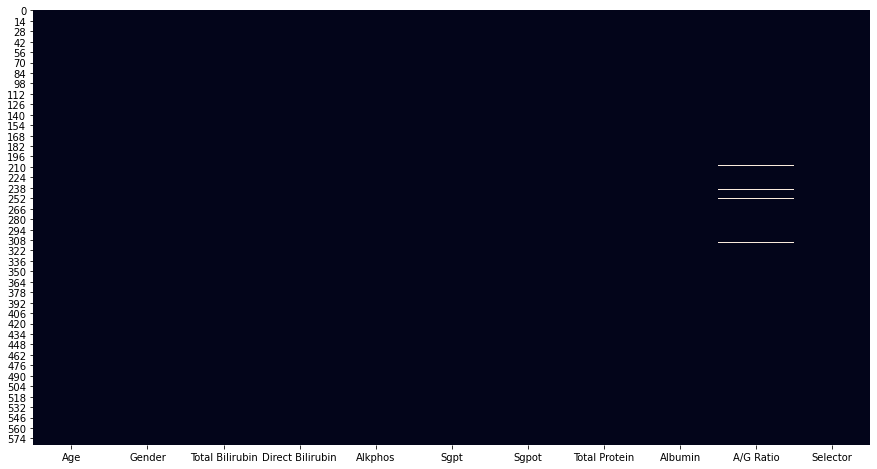

In [15]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [75]:
df['A/G Ratio'].fillna(df['A/G Ratio'].median(),inplace=True)
df.isnull().sum() 

Age                 0
Gender              0
Total Bilirubin     0
Direct Bilirubin    0
Alkphos             0
Sgpt                0
Sgpot               0
Total Protein       0
Albumin             0
A/G Ratio           0
Selector            0
dtype: int64

<IPython.core.display.Javascript object>

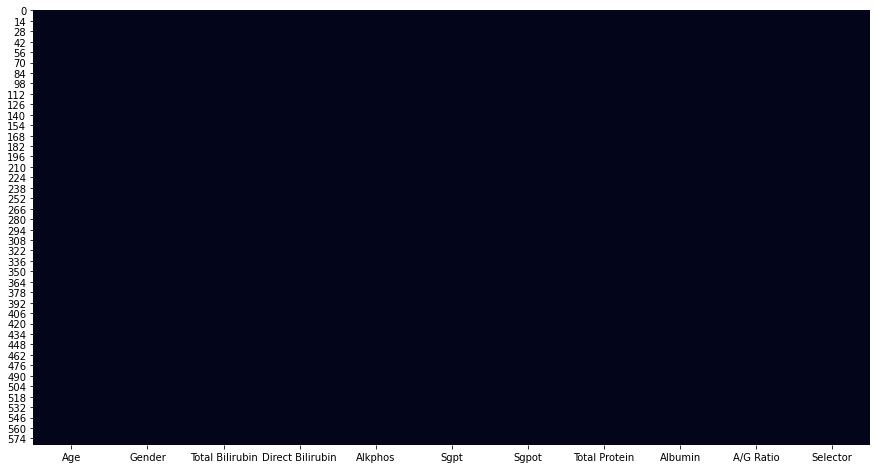

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

## 6. Outlier Treatment

#### Separate the variables into Numerical and Categorical Columns 

In [76]:
num_cols=df.drop('Selector',axis=1).select_dtypes(exclude='object')
cat_cols=df.select_dtypes(exclude='object')
print(num_cols.columns)
print(cat_cols.columns)

Index(['Age', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos', 'Sgpt',
       'Sgpot', 'Total Protein', 'Albumin', 'A/G Ratio'],
      dtype='object')
Index(['Age', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos', 'Sgpt',
       'Sgpot', 'Total Protein', 'Albumin', 'A/G Ratio', 'Selector'],
      dtype='object')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

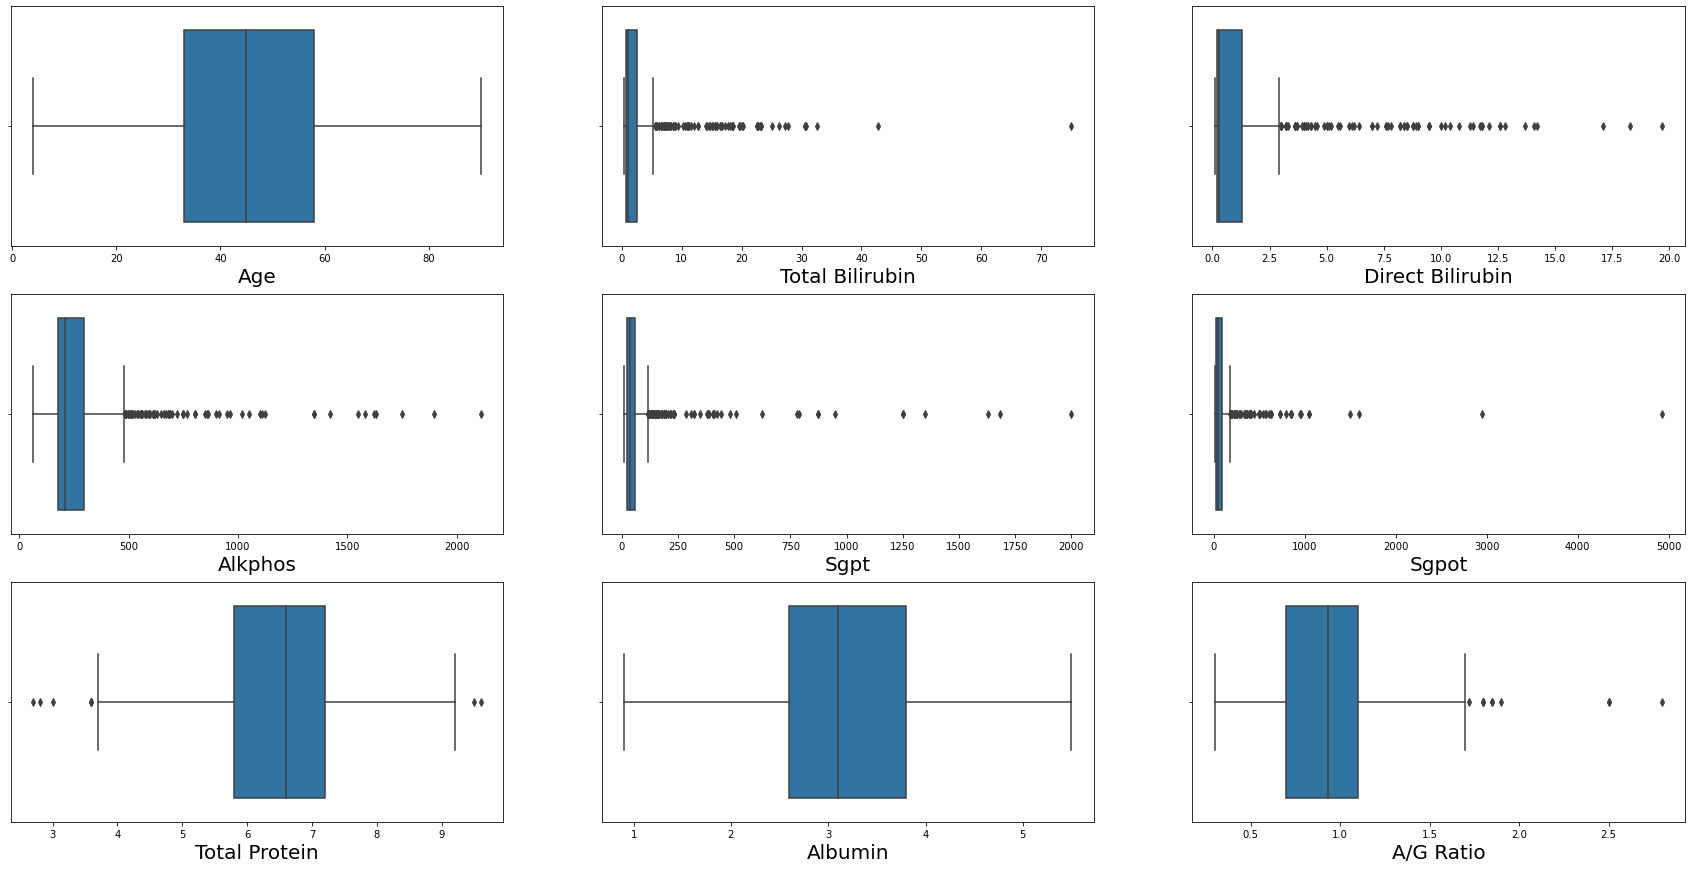

In [77]:
fig, ax = plt.subplots(3, 3, figsize=(30, 15))
for variable, subplot in zip(num_cols.columns, ax.flatten()):
    z = sns.boxplot(x = num_cols[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 20)

In [78]:
q1=num_cols.quantile(0.25)
q3=num_cols.quantile(0.75)
iqr=q3-q1
iqr

Age                  25.0
Total Bilirubin       1.8
Direct Bilirubin      1.1
Alkphos             122.5
Sgpt                 37.5
Sgpot                62.0
Total Protein         1.4
Albumin               1.2
A/G Ratio             0.4
dtype: float64

In [79]:
df=df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]

In [80]:
df.shape

(398, 11)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

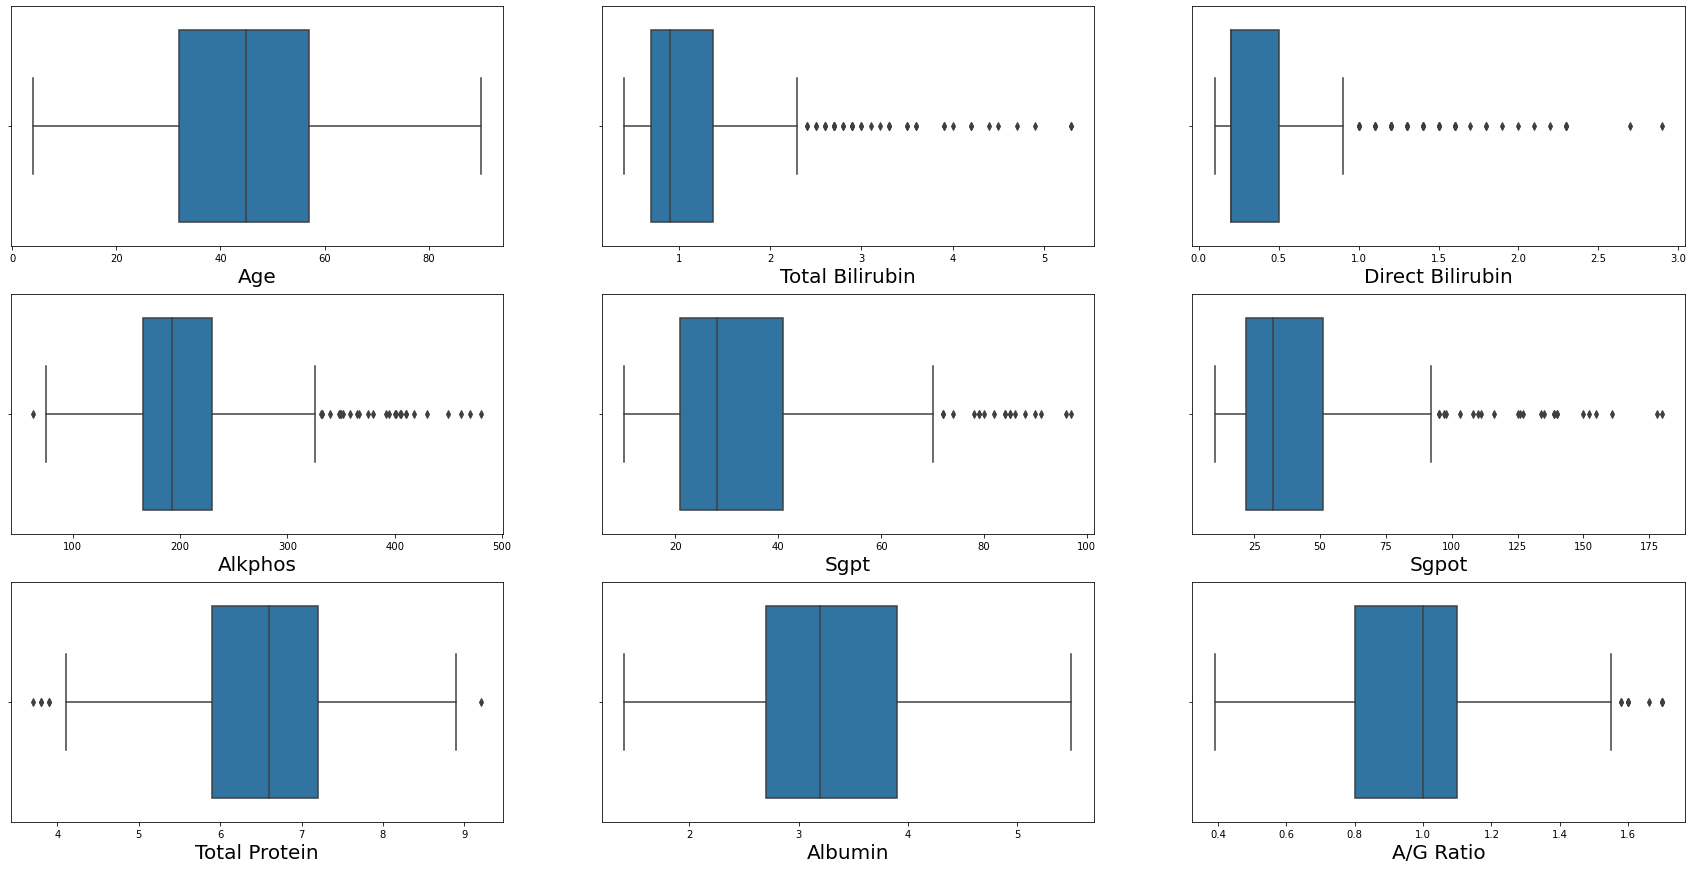

In [81]:
fig, ax = plt.subplots(3, 3, figsize=(30, 15))
for variable, subplot in zip(num_cols.columns, ax.flatten()):
    z = sns.boxplot(x = df[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)

## 7. Dummy Encoding the Categorical Variables

#### Split the target and independent variables

In [120]:
df_target=df['Selector']
df_feature=df.drop('Selector',axis=1)

In [121]:
num_cols=df_feature.select_dtypes(exclude='object')
dummy=pd.get_dummies(df_feature['Gender'],drop_first=True)

<IPython.core.display.Javascript object>

In [122]:
X=pd.concat([num_cols,dummy],axis=1)
X.head()

<IPython.core.display.Javascript object>

,Age,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.9,0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.4,1
5,46,1.8,0.7,208,19,14,7.6,4.4,1.3,1
6,26,0.9,0.2,154,16,12,7.0,3.5,1.0,0


## 8. Distribution of Variables

#### Distribution of Independent Numeric Variables

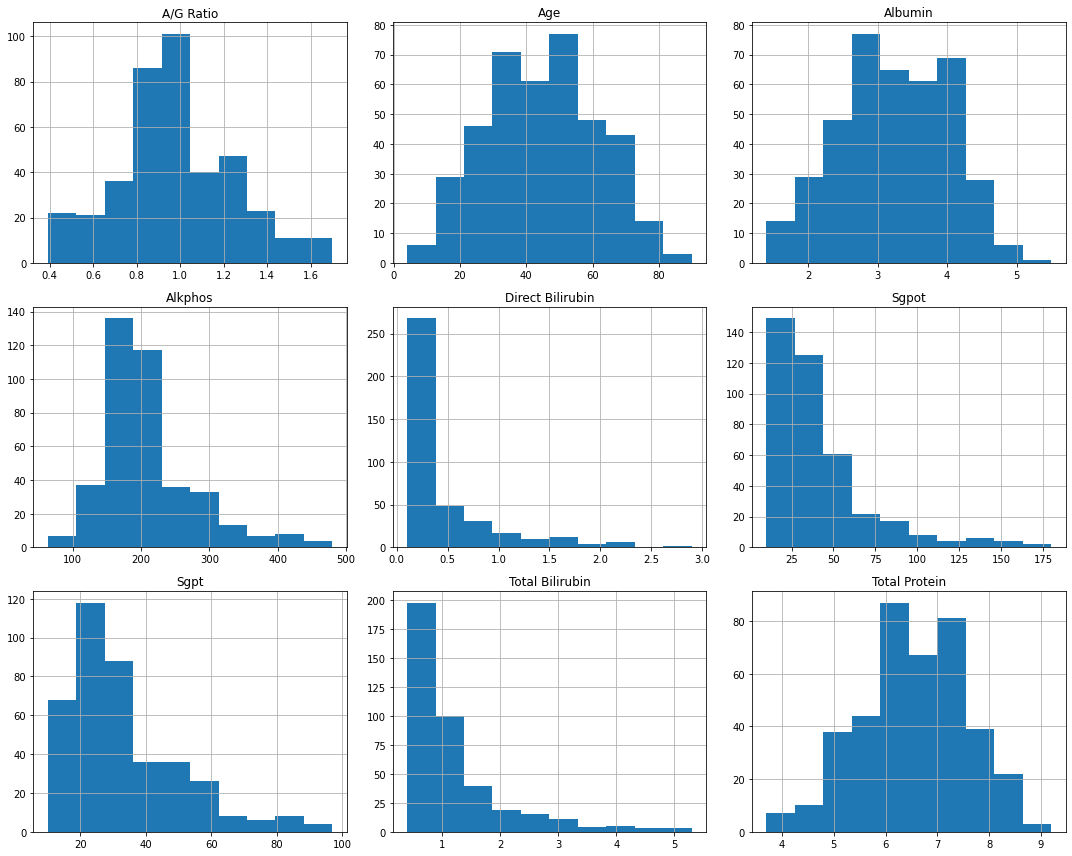

In [30]:
X.drop('Male',axis=1).hist()
plt.tight_layout()
plt.show()

In [31]:
X.skew()

Age                 0.008771
Total Bilirubin     2.301747
Direct Bilirubin    2.248644
Alkphos             1.415255
Sgpt                1.310739
Sgpot               2.074940
Total Protein      -0.175303
Albumin            -0.098783
A/G Ratio           0.276378
Male               -1.018010
dtype: float64

**Interpretation:** The Variables Age, Total Bilirubin, Direct Bilirubin, Alkphos, Sgpt, Sgpot and A/G Ratio are positively skewed while Male, Total Protein, Albumin are negatively skewed.

### Visual Analysis of the Target Variable

<IPython.core.display.Javascript object>

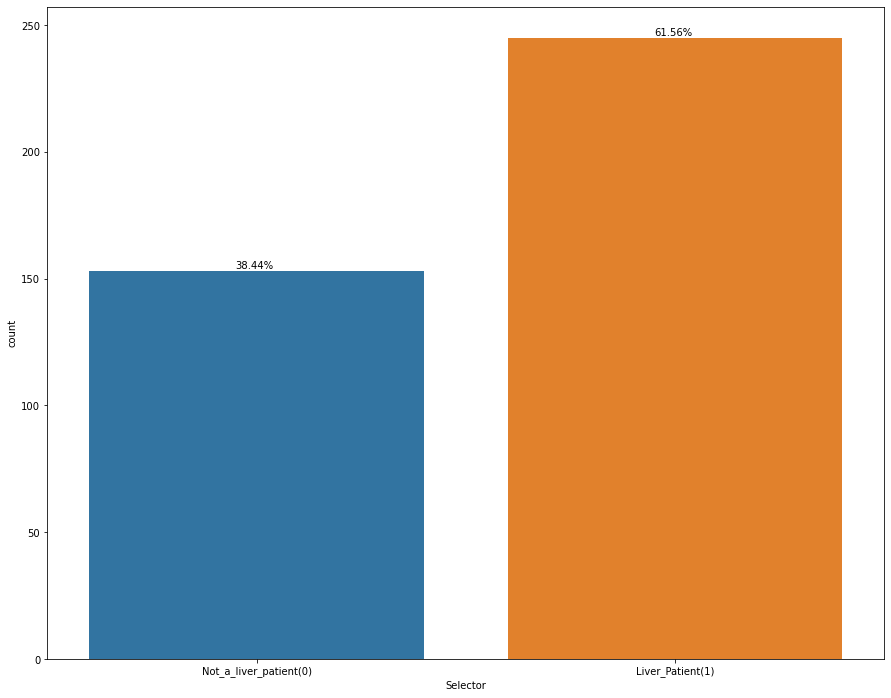

In [32]:
fig = sns.countplot(df['Selector'])
fig.set_xticklabels(['Not_a_liver_patient(0)','Liver_Patient(1)'])
plt.text(x = -0.05, y = df['Selector'].value_counts()[0] + 1, 
         s = str(round((df['Selector'].value_counts()[0])*100/len(df['Selector']),2)) + '%')
plt.text(x = 0.95, y = df['Selector'].value_counts()[1] + 1, 
         s = str(round((df['Selector'].value_counts()[1])*100/len(df['Selector']),2)) + '%')
plt.show()

**Interpretation:** The countplot of the Target Variable indicates no severe Imbalance in the data as 38.44% of the Patients are not having any Liver Disease while 61.56% of the Patients are having Liver Disease.

### Correlation between the Independent Variables

<IPython.core.display.Javascript object>

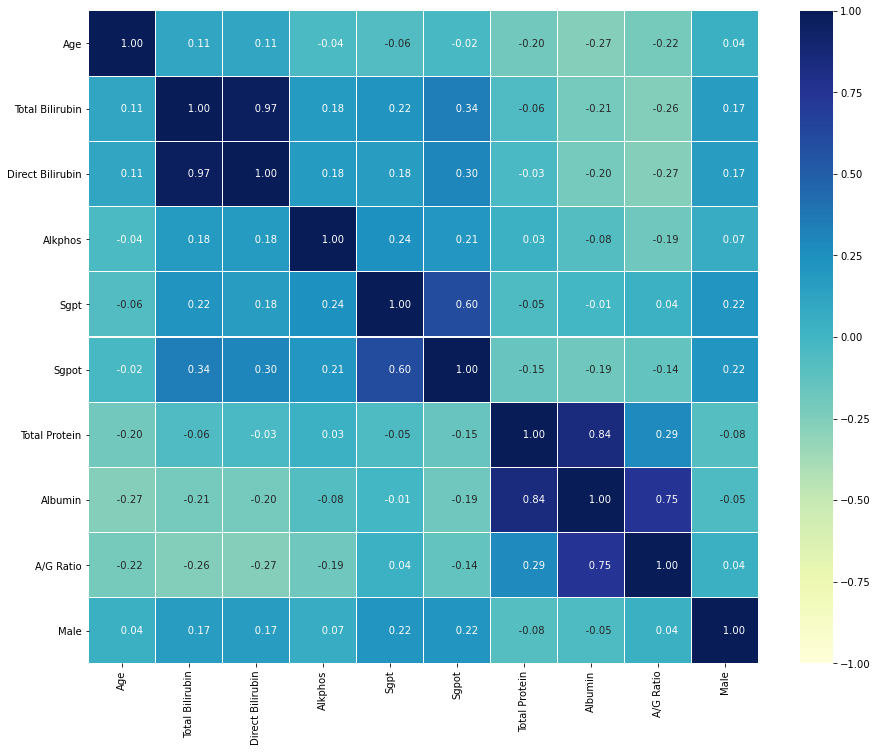

In [33]:
sns.heatmap(X.corr(), 
            annot=True,linewidths = 0.05, vmin = -1 ,
            vmax = 1, cmap = "YlGnBu" , fmt = '10.2f')
plt.show()

**Interpretation:** There are some signs of Multi-Collinearity between the Independent Variables, overall though it has very less Multi-Collinearity.

## 9. Train-Test Split

In [123]:
X_train, X_test, y_train, y_test = train_test_split( X,df_target, test_size=0.3, random_state=10 )
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (278, 10)
X_test:  (120, 10)
y_train:  (278,)
y_test:  (120,)


## 10.  Imbalanced dataset treatment using SMOTE Technique

In [124]:
smote = SMOTE()
X_sm,  y_sm =  smote.fit_resample(X_train, y_train)
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_sm))

Before SMOTE:  Counter({1: 174, 0: 104})
After SMOTE:  Counter({0: 174, 1: 174})


In [125]:
X_sm.columns

Index(['Age', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos', 'Sgpt',
       'Sgpot', 'Total Protein', 'Albumin', 'A/G Ratio', 'Male'],
      dtype='object')

In [126]:
X_sm.shape

(348, 10)

#### Create a generalized function to calculate the metrics for the train and test sets

In [52]:
def get_train_report(model):
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True,  cbar = False,linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Liver Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

<a id="model"></a>
# D. MODEL BUILDING

# 1 Logistic Regression Model

## 1.1 Logistic Regression Model using Logit

### 1.1.1 Splitting the data into train and test set.

In [41]:
X=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split( X,df_target, test_size=0.3, random_state=10 )
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (278, 11)
X_test:  (120, 11)
y_train:  (278,)
y_test:  (120,)


### 1.1.2 Building a logistic regression model using all the variables in the dataset.

In [42]:
logreg = sm.Logit(y_train, X_train).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.592995
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Selector   No. Observations:                  278
Model:                          Logit   Df Residuals:                      267
Method:                           MLE   Df Model:                           10
Date:                Wed, 26 May 2021   Pseudo R-squ.:                  0.1030
Time:                        00:59:54   Log-Likelihood:                -164.85
converged:                       True   LL-Null:                       -183.79
Covariance Type:            nonrobust   LLR p-value:                 4.002e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.5823      2.335     -2.819      0.005     -11.159      -2.006
Age        

### 1.1.3 Finding out the odds of each variable has in Liver Patient Selector.

In [43]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 
df_odds

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Odds
const,0.001385
Age,1.028985
Total Bilirubin,0.633186
Direct Bilirubin,2.958346
Alkphos,1.004268
Sgpt,1.003710
Sgpot,1.007727
Total Protein,6.313688
Albumin,0.030528
A/G Ratio,81.731665


**Interpretation:**

odds_const: The odds of getting an admission is 0.001385, considering all other variables take zero value.

odds_Age = 1.028985, it implies that the odds of having Liver Disease increases by a factor of 1.028985 due to one unit increase in the Age, keeping other variables constant.

odds_Total Billirubin = 0.633186, it implies that the odds of having Liver Disease increases by a factor of 0.633186 due to one unit increase in the Total Bilirubin, keeping other variables constant.

odds_Direct Bilirubin = 2.958346, it implies that the odds of having Liver Disease increases by a factor of 2.958346 due to one unit increase in the Direct Bilirubin, keeping other variables constant.

odds_Alkphos = 1.004268, it implies that the odds of having Liver Disease increases by a factor of 1.004268 due to one unit increase in the Alkphos, keeping other variables constant.

odds_Sgpt = 1.003710, it implies that the odds of having Liver Disease increases by a factor of 1.003710 due to one unit increase in the Sgpt, keeping other variables constant.

odds_Sgpot = 1.007727, it implies that the odds of having Liver Disease increases by a factor of 1.007727 due to one unit increase in the Sgpot, keeping other variables constant.

odds_Total Protein = 6.313688, it implies that the odds of having Liver Disease increases by a factor of 6.313688 due to one unit increase in the Total Protein, keeping other variables constant.

odds_Albumin = 0.030528, it implies that the odds of having Liver Disease increases by a factor of 0.030528 due to one unit increase in the Albumin, keeping other variables constant.

odds_A/G Ratio = 81.731665, it implies that the odds of having Liver Disease increases by a factor of 81.731665 due to one unit increase in the A/G Ratio, keeping other variables constant.

odds_Male = 0.616936, it implies that the odds of having Liver Disease increases by a factor of 0.616936 due to one unit increase in the Male, keeping other variables constant.

### 1.1.4 Finding out the optimal cut-off probability using Youdens Index.

In [44]:
y_pred_prob = logreg.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

<IPython.core.display.Javascript object>

,TPR,FPR,Threshold,Difference
0,0.380282,0.224490,0.685771,0.155792
1,0.295775,0.142857,0.747662,0.152918
2,0.676056,0.530612,0.544809,0.145444
3,0.605634,0.469388,0.591344,0.136246
4,0.338028,0.204082,0.703608,0.133947


From Youden's Index we obtain the optimal cut-off probability of 0.69. Let us consider this cut-off to predict the target values. i.e. if 'y_pred_prob' is less than 0.69, then consider it to be 0 else consider it to be 1.

### 1.1.5 Finding out the Accuracy, recall, f1-score and kappa value of the model.

In [46]:
y_pred = [ 0 if x < 0.69 else 1 for x in y_pred_prob]
c=confusion_matrix(y_test,y_pred)
TN = c[0,0]
TP = c[1,1]
FP = c[0,1]
FN = c[1,0]
accuracy = (TN+TP) / (TN+FP+FN+TP)
precision = TP / (TP+FP)
recall = TP / (TP+FN)
f1_score = 2*((precision*recall)/(precision+recall))
kappa = cohen_kappa_score(y_test, y_pred)
print('kappa value of the Full Model:',round(kappa,2))
print('Accuracy of the Full Model is: ',round(accuracy,2))
print('Recall of the Full Model is: ',round(recall,2))
print('F1 score of the Full Model is: ',round(f1_score,2))

kappa value of the Full Model: 0.13
Accuracy of the Full Model is:  0.53
Recall of the Full Model is:  0.37
F1 score of the Full Model is:  0.48


**Interpretation**: As the kappa score for the Full model (with cut-off probability 0.69) is 0.130, we can say that there is slight agreement between the actual and predicted values.
Accuracy of the Full Model is 53%

### 1.1.6 Plotting the Confusion Matrix and ROC Curve of the built model.

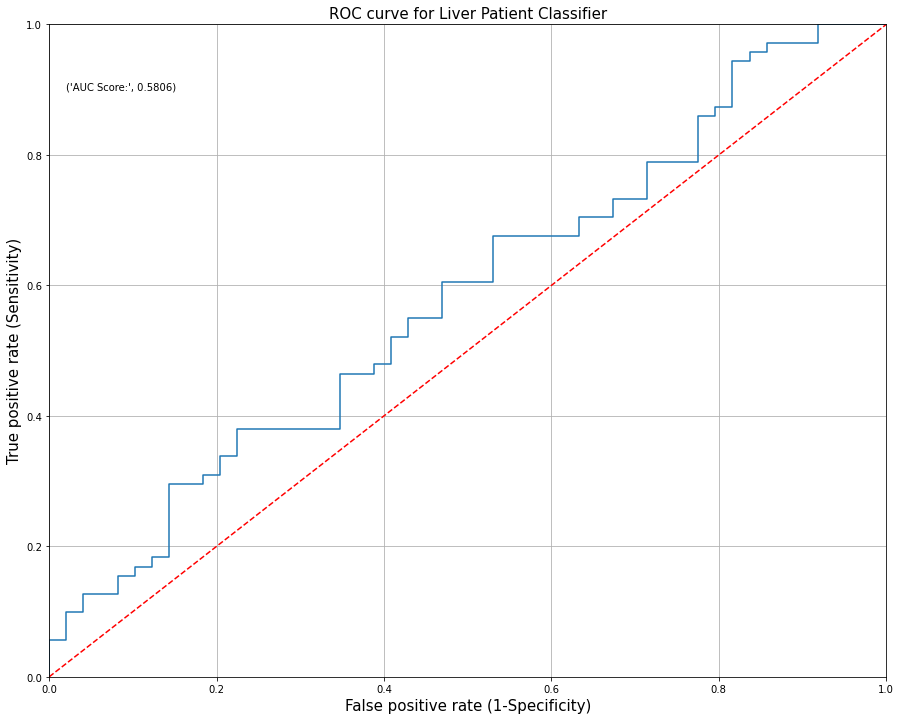

In [47]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Liver Patient Classifier', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

ROC Curve for Logistic Regression Full Model prepared using Logit.

AUC Score: 0.5806

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

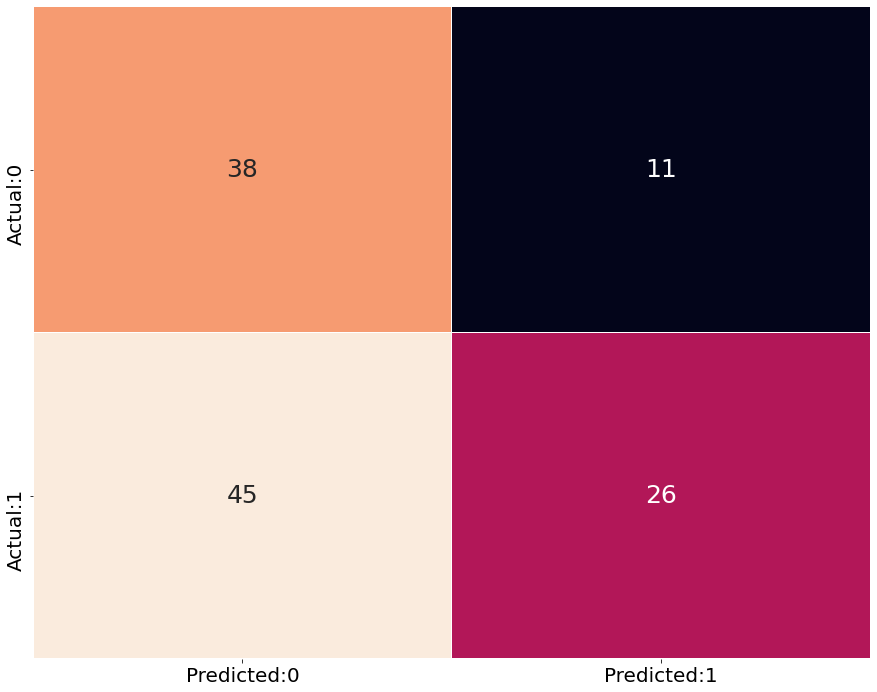

In [48]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

Confusion Matrix of the Full Model built using Logit.

## 1.2 Logistic Regression Model using sklearn.linear_model.Logistic Regression

### 1.2.1 Splitting the data into train and test set.

In [89]:
X_train, X_test, y_train, y_test = train_test_split( X,df_target, test_size=0.3, random_state=10 )
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (278, 10)
X_test:  (120, 10)
y_train:  (278,)
y_test:  (120,)


### 1.2.2 Building a model using LogisticRegression().

In [90]:
lr=LogisticRegression()
log1=lr.fit(X_train,y_train)
y_pred=log1.predict(X_test)           

### 1.2.3 Printing out the classification report of the built model.

In [91]:
print(get_train_report(log1))

              precision    recall  f1-score   support

           0       0.59      0.36      0.44       104
           1       0.69      0.85      0.76       174

    accuracy                           0.67       278
   macro avg       0.64      0.60      0.60       278
weighted avg       0.65      0.67      0.64       278



In [92]:
print(get_test_report(log1))

              precision    recall  f1-score   support

           0       0.37      0.20      0.26        49
           1       0.58      0.76      0.66        71

    accuracy                           0.53       120
   macro avg       0.48      0.48      0.46       120
weighted avg       0.49      0.53      0.50       120



Classification report of train and test dataset on model built using LogisticRegression() suggests Over-Fitting.

### 1.2.4 Plotting the Confusion Matrix and ROC Curve of the built model.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

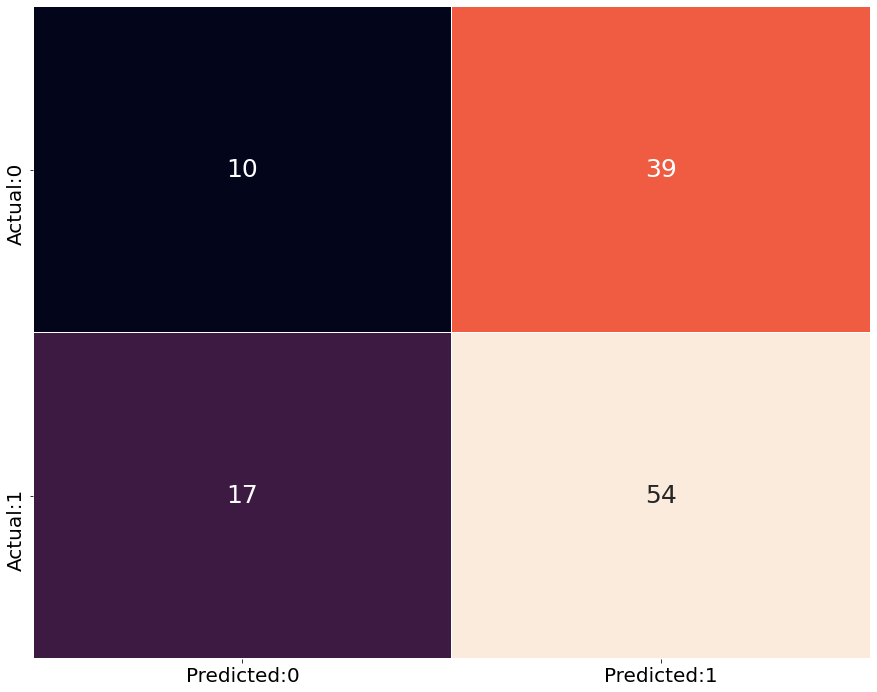

In [93]:
plot_confusion_matrix(log1)

Confusion Matrix of the Full Model built using LogisticRegression()

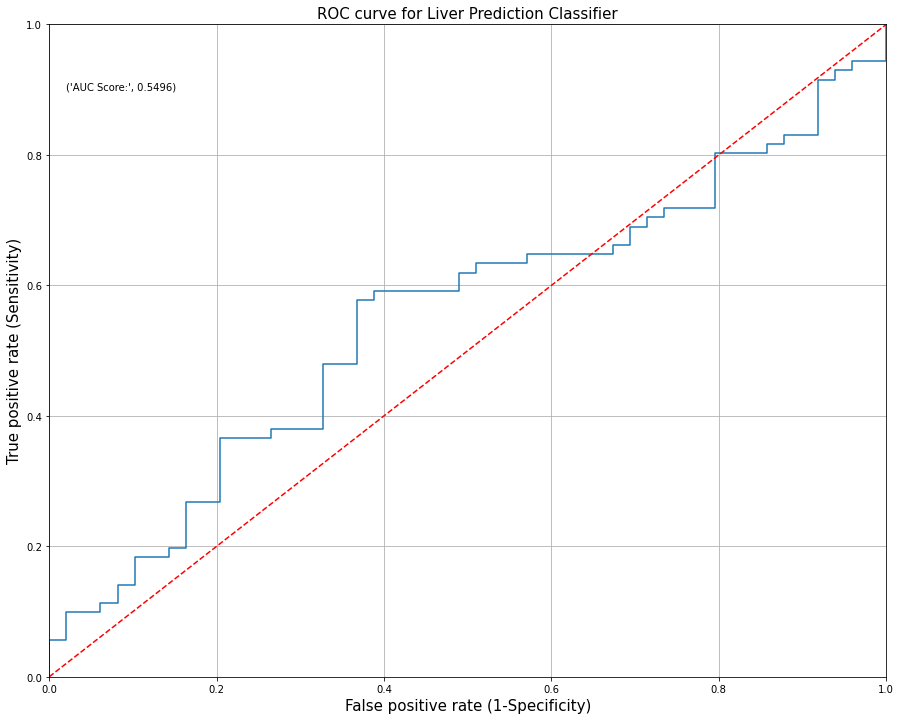

In [94]:
plot_roc(log1)

ROC Curve of the Full Model built using LogisticRegression().

AUC Score: 0.5496

## 1.3 Recursive Feature Elimination (RFE)

In [57]:
X=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split( X,df_target, test_size=0.3, random_state=10 )
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (278, 11)
X_test:  (120, 11)
y_train:  (278,)
y_test:  (120,)


In [58]:
X_train_rfe = X_train.iloc[:,1:]
X_test_rfe = X_test.iloc[:,1:]
logreg = LogisticRegression()
rfe_model = RFE(estimator = logreg, n_features_to_select = 3)
rfe_model = rfe_model.fit(X_train_rfe, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

<IPython.core.display.Javascript object>

Index(['Direct Bilirubin', 'Total Protein', 'Albumin'], dtype='object')


### 1.3.1 Build the logisitc regression model using the variables obtained from RFE.

In [59]:
logreg_rfe = sm.Logit(y_train, X_train[['Direct Bilirubin', 'Total Protein', 'Albumin']]).fit()
print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.632438
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Selector   No. Observations:                  278
Model:                          Logit   Df Residuals:                      275
Method:                           MLE   Df Model:                            2
Date:                Wed, 26 May 2021   Pseudo R-squ.:                 0.04336
Time:                        01:15:02   Log-Likelihood:                -175.82
converged:                       True   LL-Null:                       -183.79
Covariance Type:            nonrobust   LLR p-value:                 0.0003461
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Direct Bilirubin     0.4747      0.310      1.532      0.126      -0.133       1.082
Total Prote

### 1.3.2 Calculate the AIC (Akaike Information Criterion) value.

It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.

In [60]:
print('AIC:', round(logreg_rfe.aic,3))

AIC: 357.635


### 1.3.3 Prediction on Test set.

In [61]:
y_pred_prob_rfe = logreg_rfe.predict(X_test[['Direct Bilirubin', 'Total Protein', 'Albumin']])

### 1.3.4 Finding out the optimal cut-off probability using Youdens Index.

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rfe)
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

<IPython.core.display.Javascript object>

,TPR,FPR,Threshold,Difference
0,0.507042,0.285714,0.636595,0.221328
1,0.535211,0.326531,0.629114,0.208681
2,0.591549,0.408163,0.612569,0.183386
3,0.507042,0.326531,0.634706,0.180512
4,0.563380,0.387755,0.619209,0.175625


From Youden's Index we obtain the optimal cut-off probability of 0.64. Let us consider this cut-off to predict the target values. i.e. if 'y_pred_prob' is less than 0.64, then consider it to be 0 else consider it to be 1.

In [63]:
y_pred_rfe = [ 0 if x < 0.64 else 1 for x in y_pred_prob_rfe]
y_pred_rfe[0:5]

[1, 1, 1, 0, 0]

### 1.3.5 Classification Report of the RFE Model.

In [64]:
result = classification_report(y_test, y_pred_rfe)
print(result)

              precision    recall  f1-score   support

           0       0.47      0.71      0.57        49
           1       0.70      0.45      0.55        71

    accuracy                           0.56       120
   macro avg       0.58      0.58      0.56       120
weighted avg       0.60      0.56      0.56       120



**Interpretation**: From the above output, we can see that the model with cut-off = 0.64 is 56% accurate.

In [65]:
kappa = cohen_kappa_score(y_test, y_pred_rfe)
print('kappa value:',round(kappa,3))

kappa value: 0.153


**Interpretation**: As the kappa score for the RFE model (with cut-off probability 0.64) is 0.153, we can say that there is slight agreement between the actual and predicted values.

### 1.3.6 Plotting the Confusion Matrix and ROC Curve of the RFE Model.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

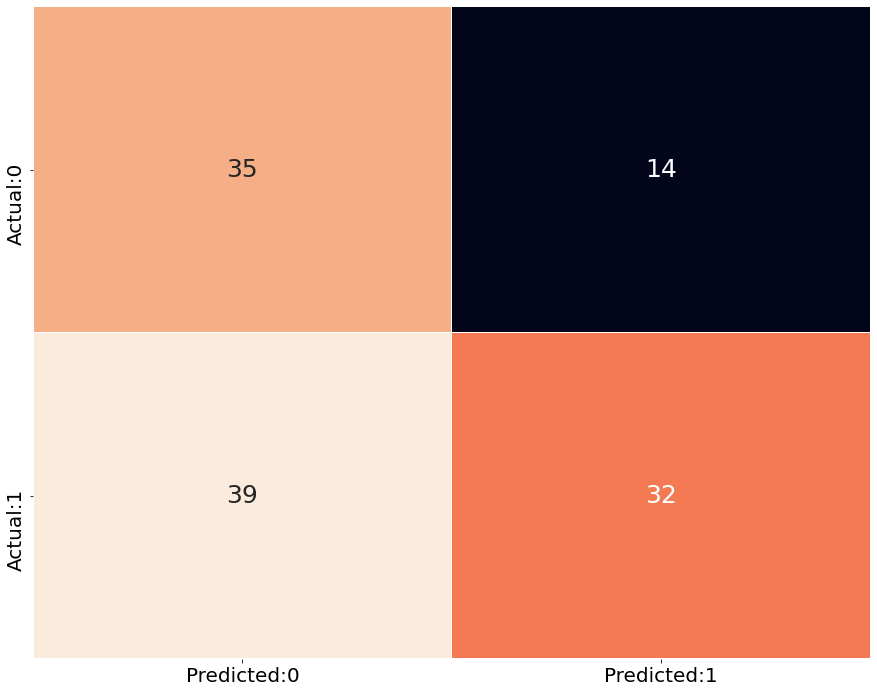

In [66]:
cm = confusion_matrix(y_test, y_pred_rfe)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

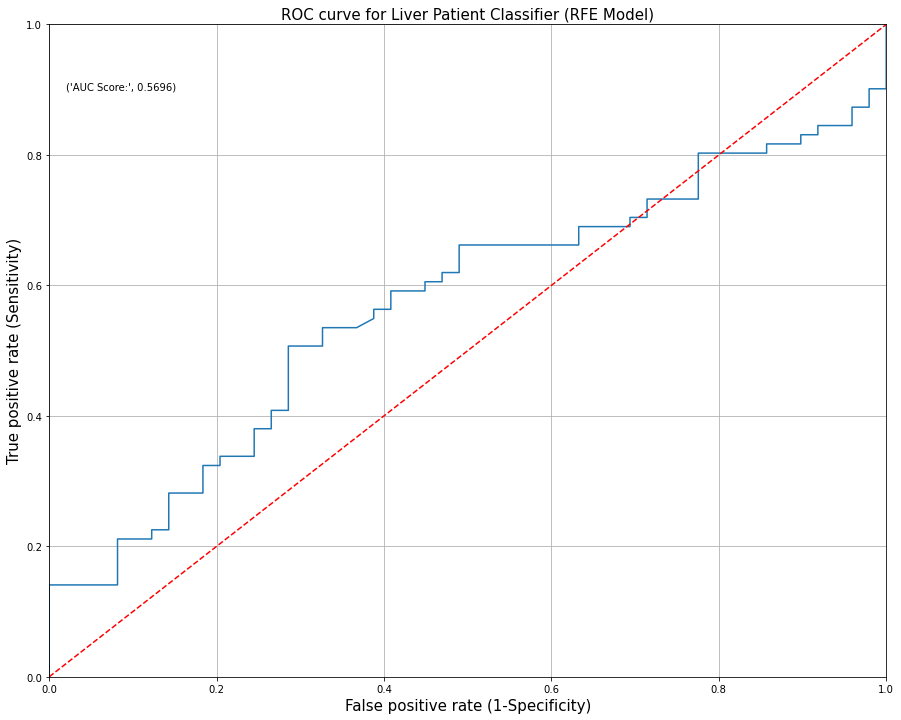

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rfe)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Liver Patient Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_rfe),4)))
plt.grid(True)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
From the above plot, we can see that our classifier (logistic regression with features obtained from RFE method) is closer to the dotted line; with the AUC score 0.5696

=========================================================================================================================

# 2. Gaussian NaiveBaye's Algorithm

### 2.1 Split the data in train and test set

In [95]:
X_train, X_test, y_train, y_test = train_test_split( X,df_target, test_size=0.3, random_state=10 )
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (278, 10)
X_test:  (120, 10)
y_train:  (278,)
y_test:  (120,)


### 2.2 Build a full model using GaussianNB()

In [96]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_sm,y_sm)

### 2.3 Computing the performance of the model

In [97]:
y_pred = gnb_model.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.54


In [98]:
kappa = cohen_kappa_score(y_test, y_pred)
print('kappa value:',round(kappa,3))

kappa value: 0.146


**Interpretation**: As the kappa score for the Naive Baye's model is 0.146, we can say that there is slight agreement between the actual and predicted values.

In [99]:
print(get_train_report(gnb_model))

              precision    recall  f1-score   support

           0       0.45      0.81      0.58       104
           1       0.78      0.40      0.53       174

    accuracy                           0.55       278
   macro avg       0.61      0.60      0.55       278
weighted avg       0.65      0.55      0.55       278



In [100]:
print(get_test_report(gnb_model))

              precision    recall  f1-score   support

           0       0.46      0.80      0.59        49
           1       0.72      0.37      0.49        71

    accuracy                           0.54       120
   macro avg       0.59      0.58      0.54       120
weighted avg       0.62      0.54      0.53       120



**Interpretation:** The train set has an accuracy of 55% while the test set has an accuracy of 54%.

### 2.4 Plotting the confusion matrix and ROC Curve of the built Model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

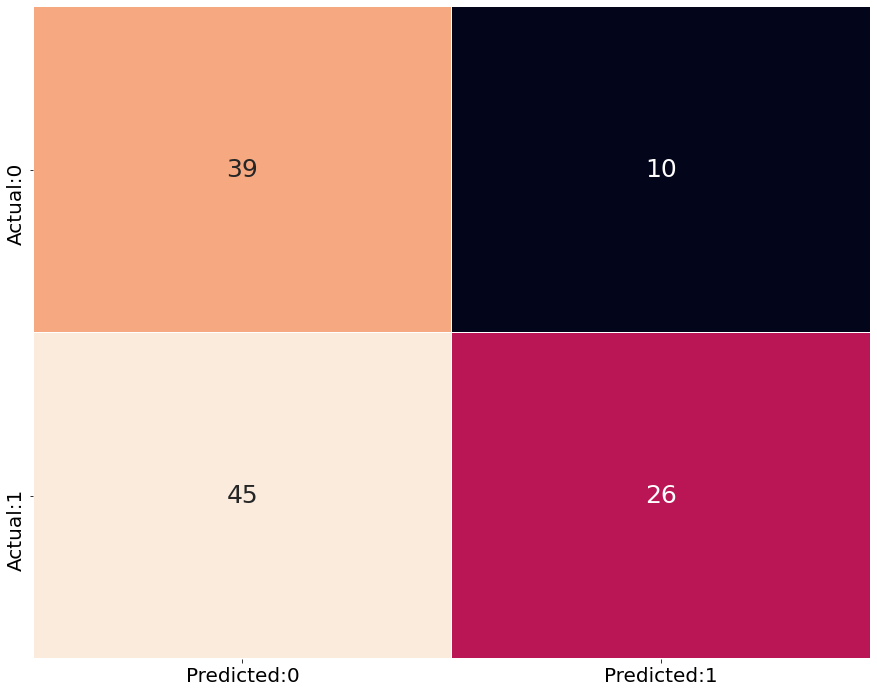

In [101]:
plot_confusion_matrix(gnb_model)

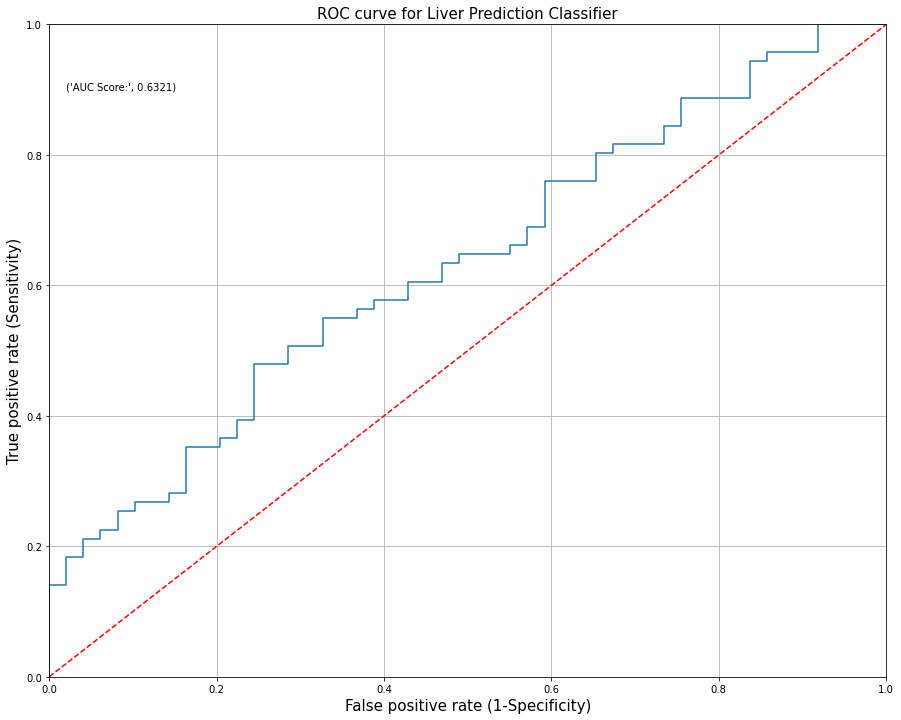

In [102]:
plot_roc(gnb_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
From the above plot, we can see that our classifier (Naive Baye's Model obtained from GaussianNB Method) is closer to the dotted line; with the AUC score 0.6321

=========================================================================================================================

# 3. K-Nearest Neighbours (KNN)

## 3.1 Scale the Data

In [118]:
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(X)
X1 = pd.DataFrame(num_scaled, columns = X.columns)
X1.head()

<IPython.core.display.Javascript object>

,Age,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio,Male
0,1.215707,-0.607419,-0.725068,-0.320525,-0.992871,-0.797009,0.267252,0.064154,-0.301147,-1.628305
1,0.795019,-0.255010,-0.101342,-0.394094,-1.108280,-0.728894,0.267252,0.196452,0.071309,0.614136
2,1.636395,3.151613,3.225193,-0.202814,-0.358118,0.599340,0.751176,-1.126524,-2.163429,0.614136
3,0.073839,0.684748,0.522383,-0.011534,-0.819756,-0.933238,1.041530,1.519428,1.188679,0.614136
4,-1.128127,-0.372479,-0.517159,-0.806081,-0.992871,-1.001352,0.460822,0.328750,0.071309,-1.628305


## 3.2 Split the Data

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X1, df_target, random_state = 10, test_size = 0.3)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (278, 10)
y_train (278,)
X_test (120, 10)
y_test (120,)


## 3.3 Tune the Parameters using GridSearchCV

In [112]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
  
knn_classification = KNeighborsClassifier(n_jobs=-1)
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        scoring = 'accuracy',n_jobs=-1)
knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

<IPython.core.display.Javascript object>

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 17} 



## 3.4 Build the Model using the Best Parameters

In [114]:
knn_classification = KNeighborsClassifier(n_neighbors = 17,metric='manhattan')
knn_model = knn_classification.fit(X_train, y_train)

## 3.5 Compute the Performance of the Model

In [115]:
y_pred = knn_model.predict(X_test)
print(round(accuracy_score(y_test, y_pred),2))

0.54


In [116]:
print("Classification Train report: ")
train_report = get_train_report(knn_model)
print(train_report)
print("Classification Test report: ")
test_report = get_test_report(knn_model)
print(test_report)

Classification Train report: 
              precision    recall  f1-score   support

           0       0.63      0.39      0.49       104
           1       0.70      0.86      0.78       174

    accuracy                           0.69       278
   macro avg       0.67      0.63      0.63       278
weighted avg       0.68      0.69      0.67       278

Classification Test report: 
              precision    recall  f1-score   support

           0       0.41      0.29      0.34        49
           1       0.59      0.72      0.65        71

    accuracy                           0.54       120
   macro avg       0.50      0.50      0.49       120
weighted avg       0.52      0.54      0.52       120



**Interpretation:** The train set has an accuracy of 69% while the test set has an accuracy of 54%. The difference between the test and train accuracy in the Model suggests overfitting.

## 3.6 Plot the Confusion Matrix and ROC Curve of the Model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

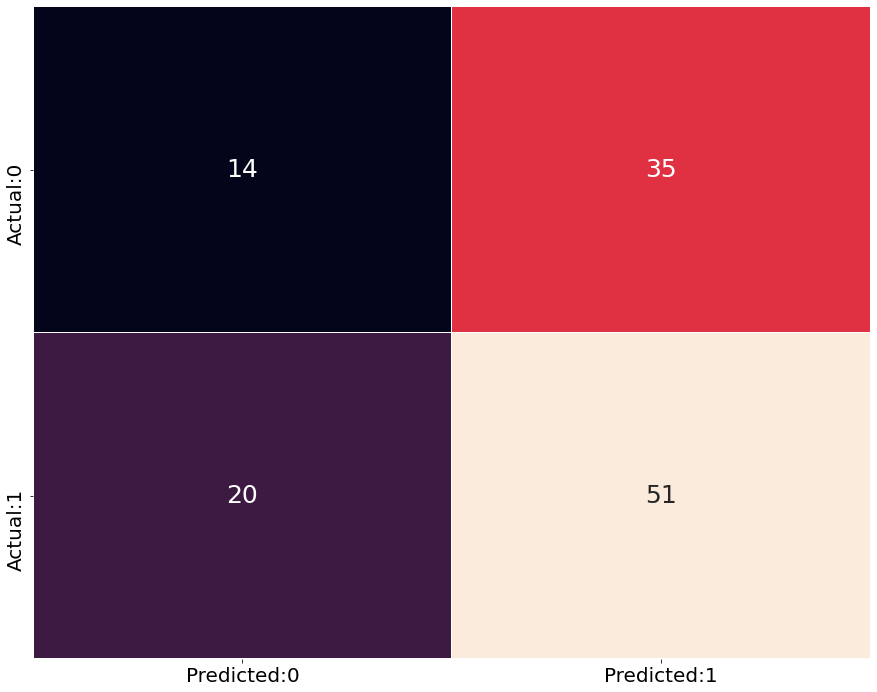

In [215]:
plot_confusion_matrix(knn_model)

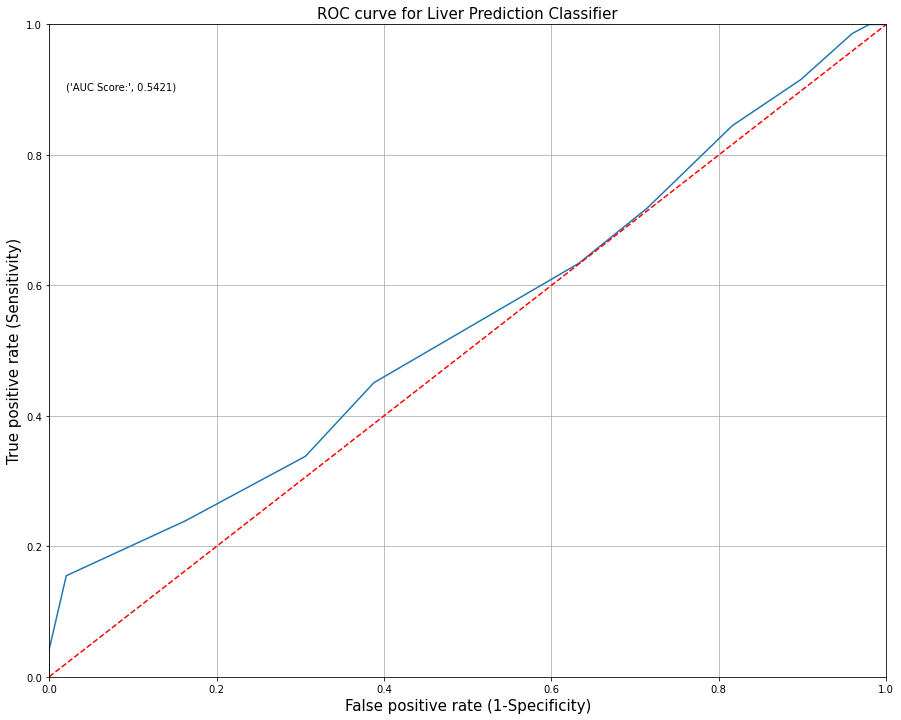

In [216]:
plot_roc(knn_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
From the above plot, we can see that our classifier (KNN with best parameters) is closer to the dotted line; with the AUC score 0.5421

========================================================================================================================

# 4. Decision Tree

## 4.1 Building a Decision Tree Model with random parameters

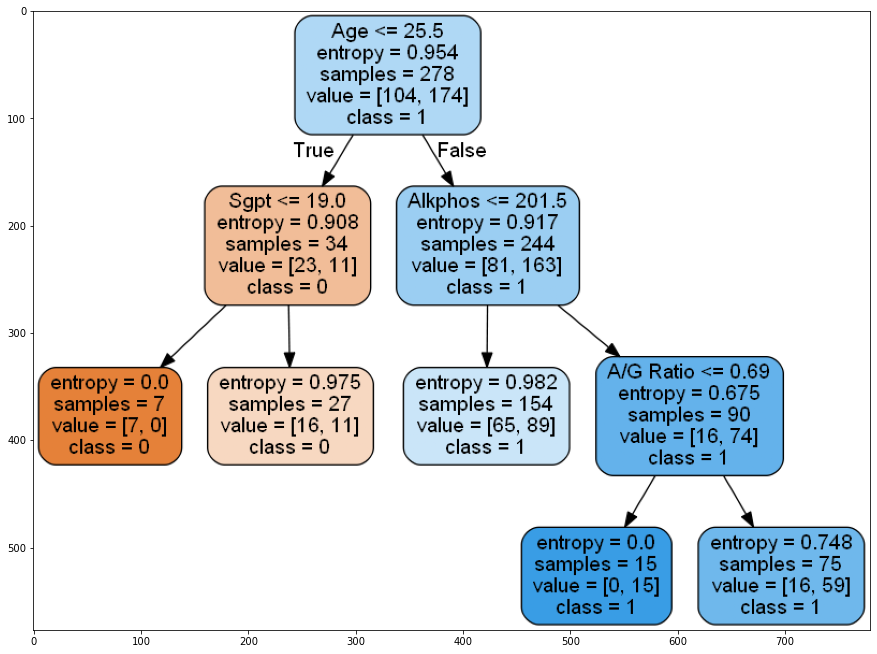

In [144]:
os.environ['PATH']=os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dt = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=5, random_state=1)
dt_model = dt.fit(X_train, y_train)
labels= X_train.columns
class_names=['0','1']

dot_data=tree.export_graphviz(dt_model,filled=True,feature_names = X_train.columns,class_names=class_names,rounded=True, )
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')    
plt.imshow(plt.imread('tree.png'))
plt.show()

### 4.1.1 Computing the performance of the model

In [145]:
y_pred = dt_model.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)

In [146]:
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.57


In [147]:
print("Classification Train report: ")
train_report = get_train_report(dt_model)
print(train_report)
print("Classification Test report: ")
test_report = get_test_report(dt_model)
print(test_report)

Classification Train report: 
              precision    recall  f1-score   support

           0       0.68      0.22      0.33       104
           1       0.67      0.94      0.78       174

    accuracy                           0.67       278
   macro avg       0.67      0.58      0.56       278
weighted avg       0.67      0.67      0.61       278

Classification Test report: 
              precision    recall  f1-score   support

           0       0.42      0.16      0.24        49
           1       0.59      0.85      0.70        71

    accuracy                           0.57       120
   macro avg       0.51      0.50      0.47       120
weighted avg       0.52      0.57      0.51       120



**Interpretation:** The train set has an accuracy of 67% while the test set has an accuracy of 57%. The difference between the test and train accuracy in the Model suggests overfitting.

### 4.1.2 Plotting the Confusion Matrix and ROC Curve of the built Model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

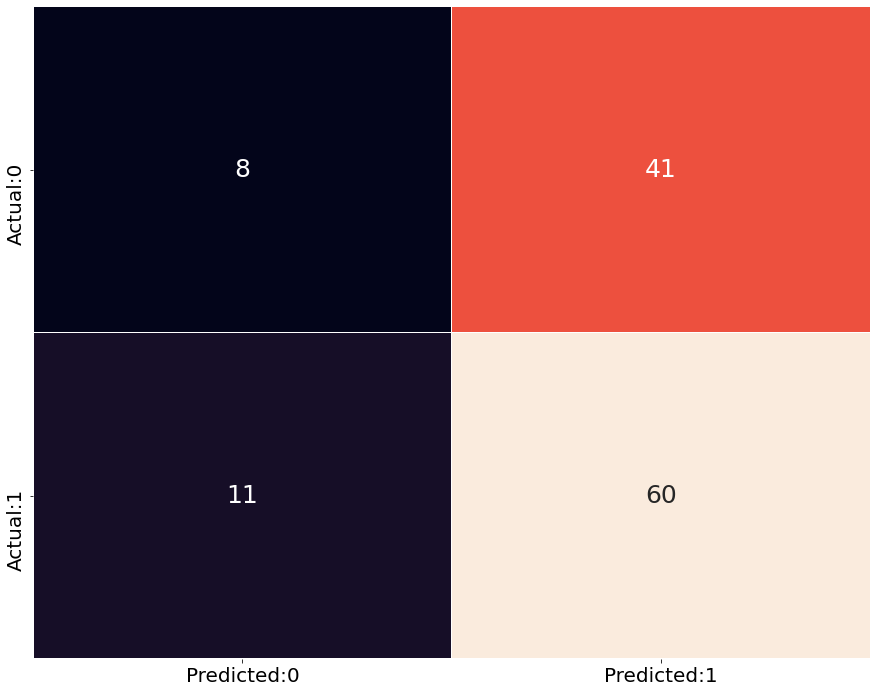

In [136]:
plot_confusion_matrix(dt_model)

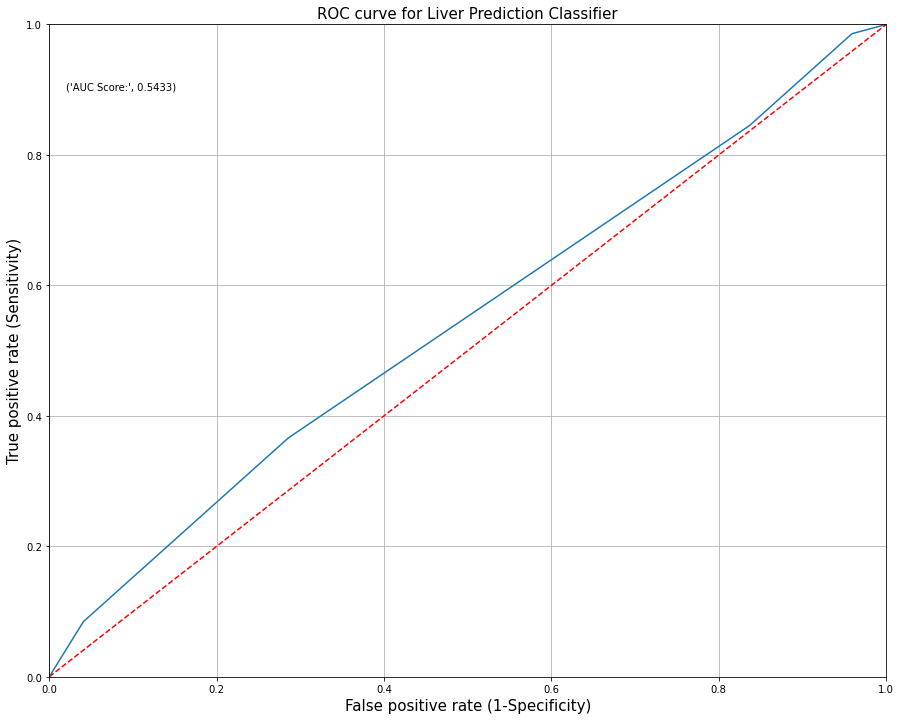

In [137]:
plot_roc(dt_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
From the above plot, we can see that our classifier (Decision Tree with random parameters) is closer to the dotted line; with the AUC score 0.5433

## 4.2 Tuning Parameters

### 4.2.1 Finding the best Parameters for Decision Tree using GridSearchCV

In [38]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
 
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2} 



**Interpretation:** From GridSearchCV we find out the best parameters using which we will build our Decision Tree Model.

### 4.2.2 Building a Decision Tree model using the best parameters.

In [148]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 3,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 5,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 10)
dt_model = dt_model.fit(X_train, y_train)

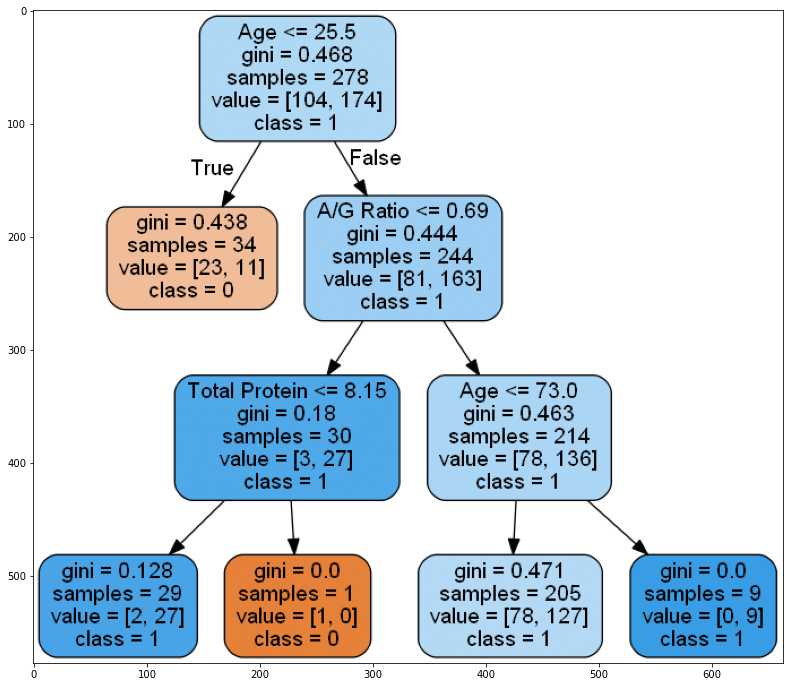

In [149]:
labels= X_train.columns
class_names=['0','1']

dot_data=tree.export_graphviz(dt_model,filled=True,feature_names = X_train.columns,class_names=class_names,rounded=True, )
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')    
plt.imshow(plt.imread('tree.png'))
plt.show()

### 4.2.3 Computing the Performance of the Tuned Parameters Model

In [150]:
print('Classification Report for train set: \n', get_train_report(dt_model))
print('Classification Report for test set: \n', get_test_report(dt_model))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.69      0.23      0.35       104
           1       0.67      0.94      0.78       174

    accuracy                           0.67       278
   macro avg       0.68      0.58      0.56       278
weighted avg       0.68      0.67      0.62       278

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.42      0.16      0.24        49
           1       0.59      0.85      0.70        71

    accuracy                           0.57       120
   macro avg       0.51      0.50      0.47       120
weighted avg       0.52      0.57      0.51       120



**Interpretation:** The train set has an accuracy of 67% while the test set has an accuracy of 57%. The difference between the test and train accuracy in the Model suggests it is not overfitting.

### 4.2.4 Plotting the Confusion Matrix and ROC Curve of the built Model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

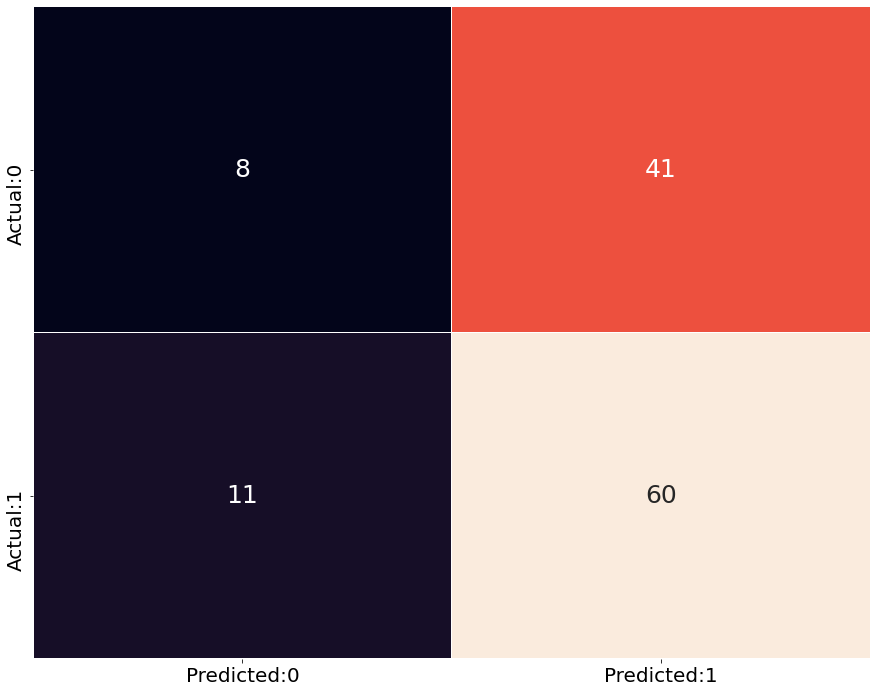

In [151]:
plot_confusion_matrix(dt_model)

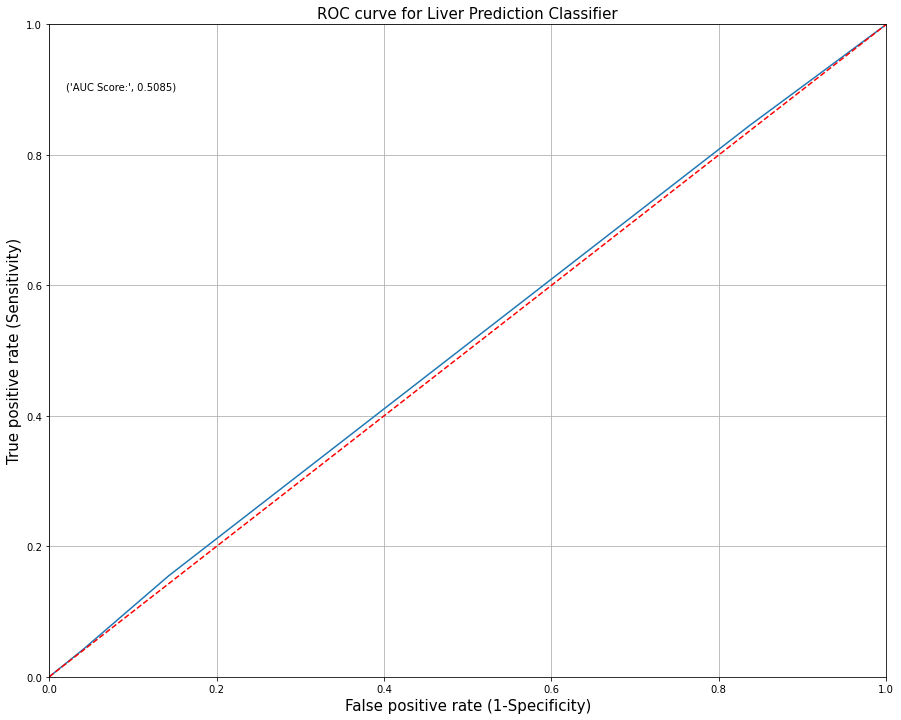

In [152]:
plot_roc(dt_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
From the above plot, we can see that our classifier (Decision Tree with best parameters obtained from Tuning using GridSearchCV) is closer to the dotted line; with the AUC score 0.5085

====================================================================================================================

# 5. Random Forest 

## 5.1 Building a Random Forest using random parameters

### 5.1.1 Build the Model

In [157]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_sm, y_sm)

### 5.1.2 Computing the Performance of the Model

In [158]:
y_pred = rf_model.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)

In [159]:
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.56


In [160]:
print("Classification Train report: ")
train_report = get_train_report(rf_model)
print(train_report)
print("Classification Test report: ")
test_report = get_test_report(rf_model)
print(test_report)

Classification Train report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       104
           1       1.00      0.97      0.98       174

    accuracy                           0.98       278
   macro avg       0.97      0.98      0.98       278
weighted avg       0.98      0.98      0.98       278

Classification Test report: 
              precision    recall  f1-score   support

           0       0.46      0.53      0.50        49
           1       0.64      0.58      0.61        71

    accuracy                           0.56       120
   macro avg       0.55      0.55      0.55       120
weighted avg       0.57      0.56      0.56       120



**Interpretation:** The train set has an accuracy of 98% while the test set has an accuracy of 56%. The difference between the test and train accuracy in the Model suggests overfitting.

### 5.1.3 Plotting the Confusion Matrix and ROC Curve of the Model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

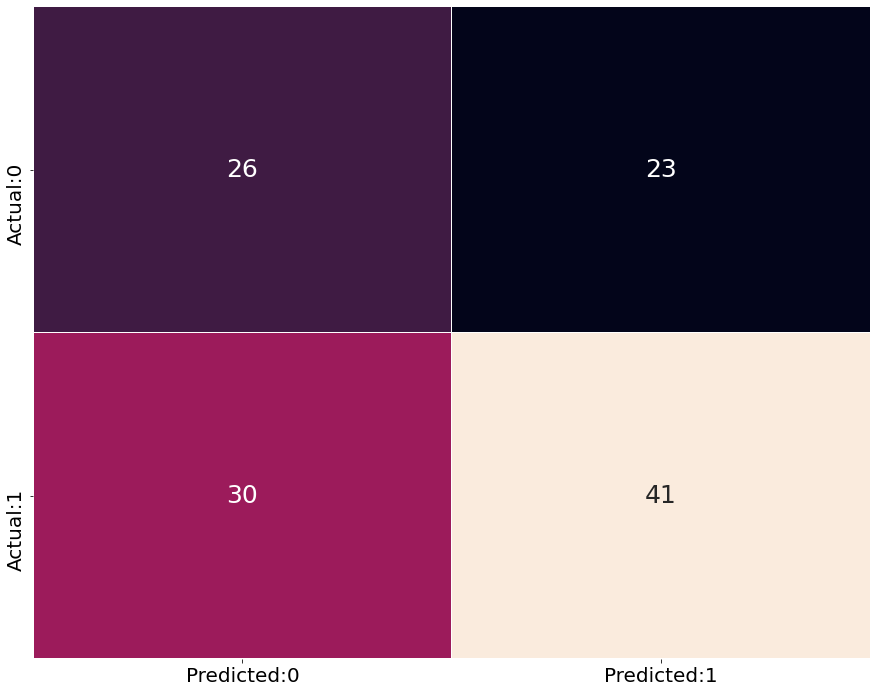

In [161]:
plot_confusion_matrix(rf_model)

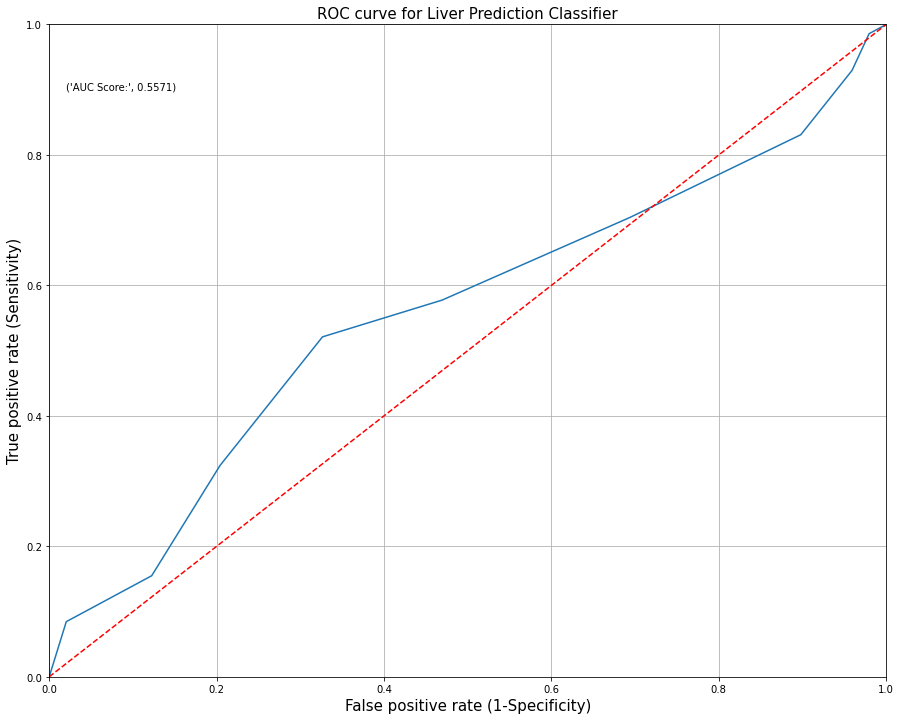

In [162]:
plot_roc(rf_model)

**Interpretation:** From the above plot, we can see that our classifier (Random Forest with random parameters) is closer to the dotted line; with the AUC score 0.5571

## 5.2 Tuning Parameters

### 5.2.1 Finding the best Parameters for Random Forest using GridSearchCV

In [43]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 20,30,40],
                     'max_depth': [5,10,15],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [1,2,3,4],
                     'min_samples_leaf': [1,2,3],
                     'max_leaf_nodes': [2, 5, 8, 11]}]

random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_sm, y_sm)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10} 



### 5.2.2 Building a Random Forest Model using the best parameters

In [167]:
rf_classification = RandomForestClassifier(criterion='entropy', 
                                           max_depth=5, 
                                           max_features='sqrt', 
                                           max_leaf_nodes= 11, 
                                           min_samples_leaf= 2, 
                                           min_samples_split= 2,
                                           n_estimators = 10, 
                                           random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)

### 5.2.3 Computing the Model Performance

In [168]:
y_pred = rf_model.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.57


In [169]:
print("Classification Train report: ")
train_report = get_train_report(rf_model)
print(train_report)
print("Classification Test report: ")
test_report = get_test_report(rf_model)
print(test_report)

Classification Train report: 
              precision    recall  f1-score   support

           0       0.88      0.48      0.62       104
           1       0.76      0.96      0.85       174

    accuracy                           0.78       278
   macro avg       0.82      0.72      0.73       278
weighted avg       0.80      0.78      0.76       278

Classification Test report: 
              precision    recall  f1-score   support

           0       0.43      0.18      0.26        49
           1       0.60      0.83      0.69        71

    accuracy                           0.57       120
   macro avg       0.51      0.51      0.48       120
weighted avg       0.53      0.57      0.52       120



**Interpretation:** The train set has an accuracy of 78% while the test set has an accuracy of 57%. The difference between the test and train accuracy in the Model suggests overfitting.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

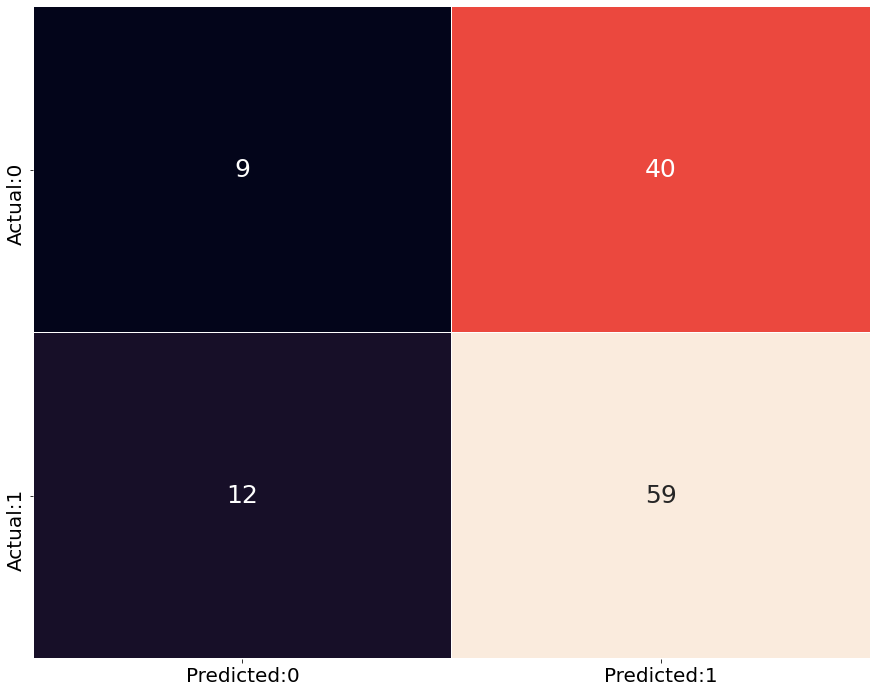

In [170]:
plot_confusion_matrix(rf_model)

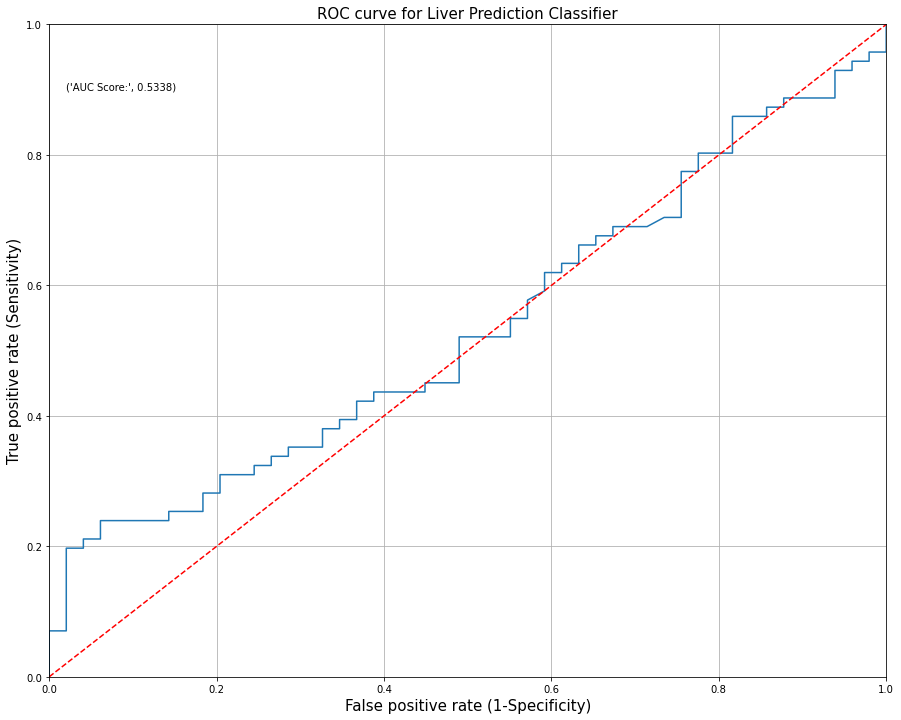

In [171]:
plot_roc(rf_model)

**Interpretation:** From the above plot, we can see that our classifier (Random Forest with best parameters obtained from Tuning using GridSearchCV) is closer to the dotted line; with the AUC score 0.5338

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

<a id="imp"></a>
# E. MODEL IMPROVEMENT

# 1. AdaBoosting

## 1.1 AdaBoosting with Random Parameters

### 1.1.1 Build the Model

In [156]:
ada_model = AdaBoostClassifier(n_estimators = 89,learning_rate=0.5, random_state = 10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=89, random_state=10)

### 1.1.2 Computing the performance of the Model

In [157]:
y_pred = ada_model.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.56


In [158]:
print("Classification Train report: ")
train_report = get_train_report(ada_model)
print(train_report)
print("Classification Test report: ")
test_report = get_test_report(ada_model)
print(test_report)

Classification Train report: 
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       104
           1       0.87      0.95      0.91       174

    accuracy                           0.88       278
   macro avg       0.89      0.86      0.87       278
weighted avg       0.89      0.88      0.88       278

Classification Test report: 
              precision    recall  f1-score   support

           0       0.44      0.29      0.35        49
           1       0.60      0.75      0.67        71

    accuracy                           0.56       120
   macro avg       0.52      0.52      0.51       120
weighted avg       0.53      0.56      0.54       120



**Interpretation:** The train set has an accuracy of 88% while the test set has an accuracy of 56%. The difference between the test and train accuracy in the Model suggests severe overfitting.

### 1.1.3 Plotting the Confusion Matrix and ROC Curve of the Model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

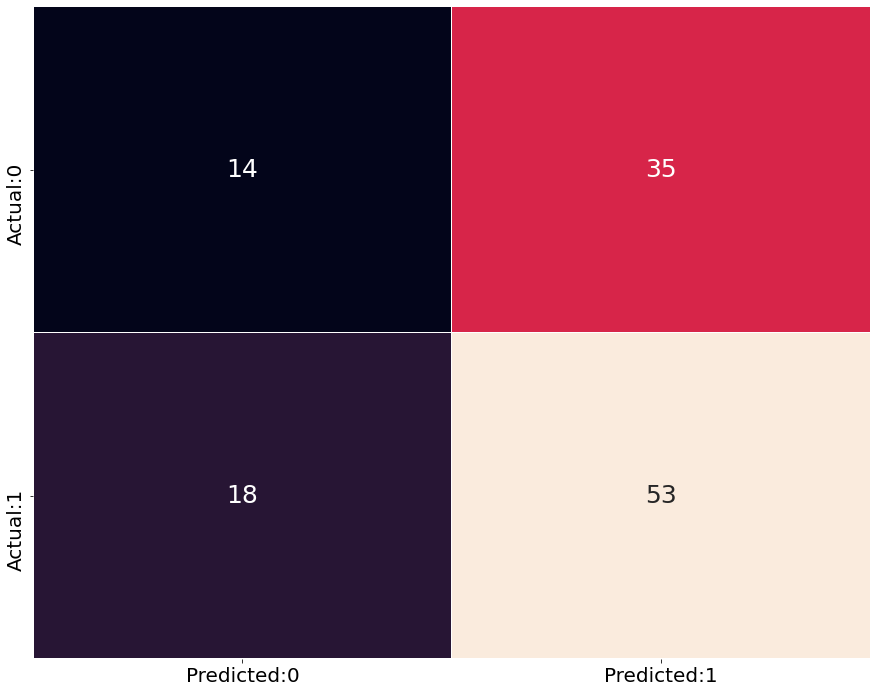

In [159]:
plot_confusion_matrix(ada_model)

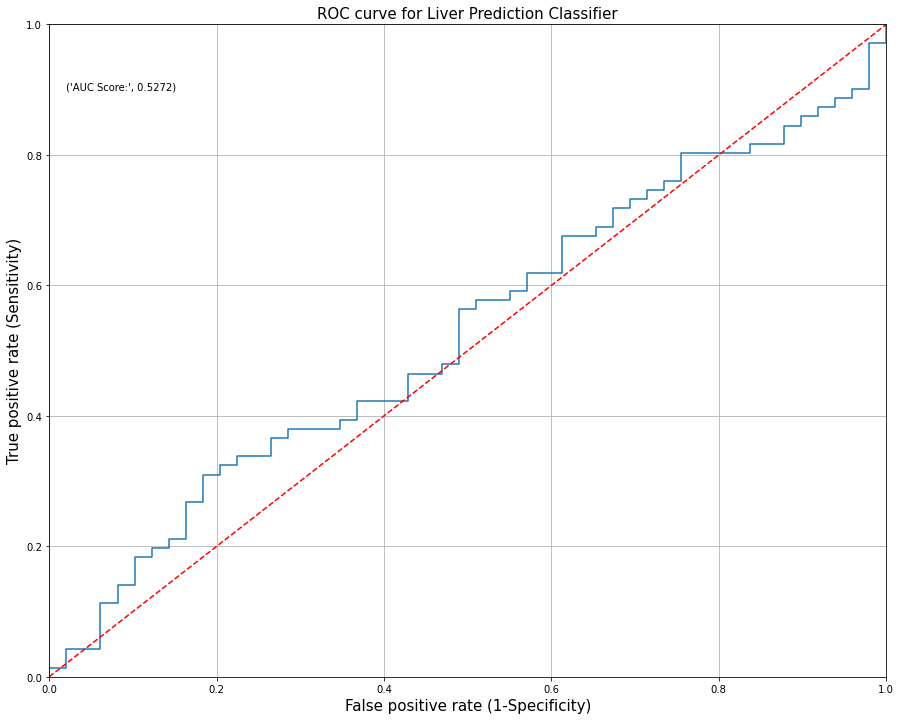

In [160]:
plot_roc(ada_model)

**Interpretation:** From the above plot, we can see that our classifier (AdaBoost with random parameters) is closer to the dotted line; with the AUC score 0.5272

## 1.2 AdaBoosting with Best Parameters

### 1.2.1 Tune with GridSearchCV

In [54]:
tuning_parameters = [{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'n_estimators': range(10,50)}]
                     
ada_x_model = AdaBoostClassifier(random_state=10)

ada_grid = GridSearchCV(estimator = ada_x_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

ada_grid.fit(X_train, y_train)

print('Best parameters for AdaBoost classifier: ', ada_grid.best_params_, '\n')

Best parameters for AdaBoost classifier:  {'learning_rate': 0.6, 'n_estimators': 49} 



### 1.2.2 Build the Model using the best parameters

In [161]:
ada_model = AdaBoostClassifier(n_estimators = 13,learning_rate=0.6, random_state = 10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.6, n_estimators=13, random_state=10)

### 1.2.3 Computing the performance of the Model

In [162]:
y_pred = ada_model.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.56


In [163]:
print("Classification Train report: ")
train_report = get_train_report(ada_model)
print(train_report)
print("Classification Test report: ")
test_report = get_test_report(ada_model)
print(test_report)

Classification Train report: 
              precision    recall  f1-score   support

           0       0.79      0.36      0.49       104
           1       0.71      0.94      0.81       174

    accuracy                           0.72       278
   macro avg       0.75      0.65      0.65       278
weighted avg       0.74      0.72      0.69       278

Classification Test report: 
              precision    recall  f1-score   support

           0       0.39      0.14      0.21        49
           1       0.59      0.85      0.69        71

    accuracy                           0.56       120
   macro avg       0.49      0.49      0.45       120
weighted avg       0.51      0.56      0.50       120



**Interpretation:** The train set has an accuracy of 72% while the test set has an accuracy of 56%. The difference between the test and train accuracy in the Model suggests overfitting.

### 1.2.4 Plotting the Confusion Matrix and ROC Curve of the Model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

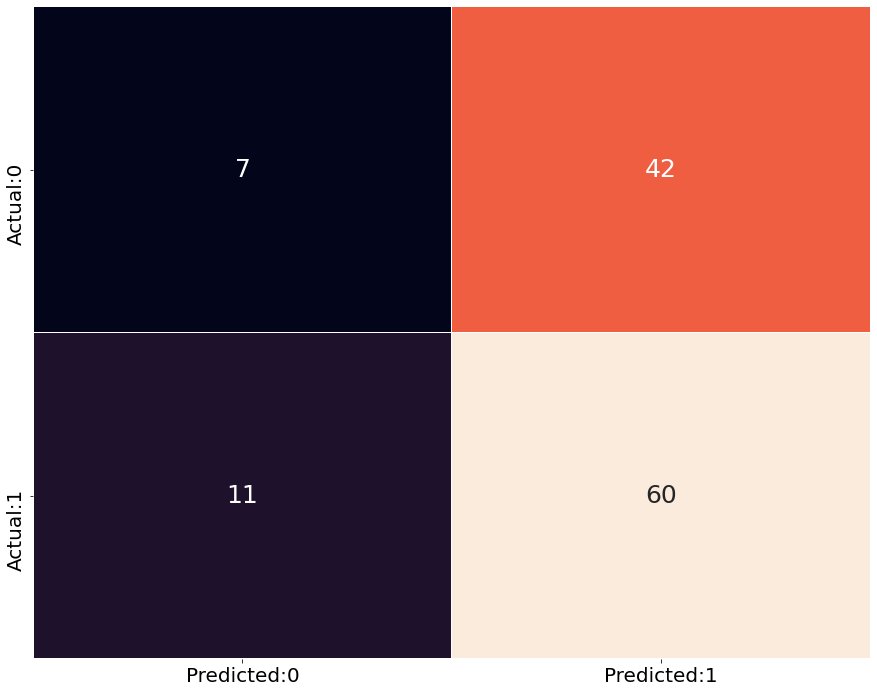

In [164]:
plot_confusion_matrix(ada_model)

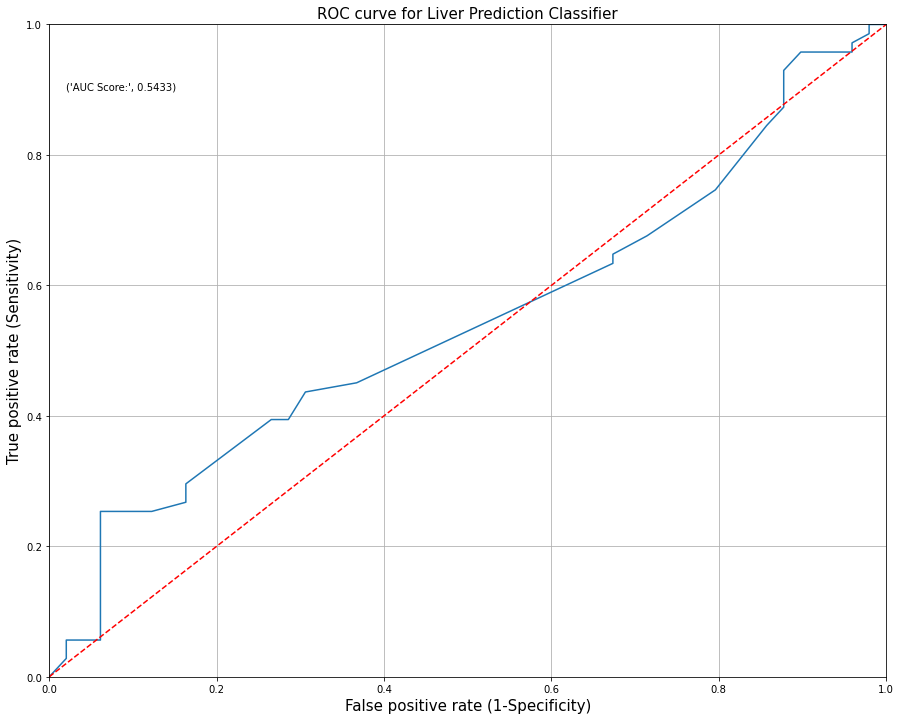

In [165]:
plot_roc(ada_model)

**Interpretation:** From the above plot, we can see that our classifier (AdaBoost with best parameters obtained from Tuning using GridSearchCV) is closer to the dotted line; with the AUC score 0.5433

=====================================================================================================================

# 2. Gradient Boosting

## 2.1 Gradient Boosting with Random Parameters

### 2.1.1 Build the Model

In [166]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

### 2.1.2 Computing the Performance of the Model

In [167]:
y_pred = gboost_model.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.54


In [168]:
print("Classification Train report: ")
train_report = get_train_report(gboost_model)
print(train_report)
print("Classification Test report: ")
test_report = get_test_report(gboost_model)
print(test_report)

Classification Train report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       174

    accuracy                           1.00       278
   macro avg       1.00      1.00      1.00       278
weighted avg       1.00      1.00      1.00       278

Classification Test report: 
              precision    recall  f1-score   support

           0       0.44      0.47      0.46        49
           1       0.62      0.59      0.60        71

    accuracy                           0.54       120
   macro avg       0.53      0.53      0.53       120
weighted avg       0.55      0.54      0.54       120



**Interpretation:** The train set has an accuracy of 100% while the test set has an accuracy of 54%. The difference between the test and train accuracy in the Model suggests severe overfitting.

### 2.1.3 Plotting the Confusion Matrix and ROC Curve of the Model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

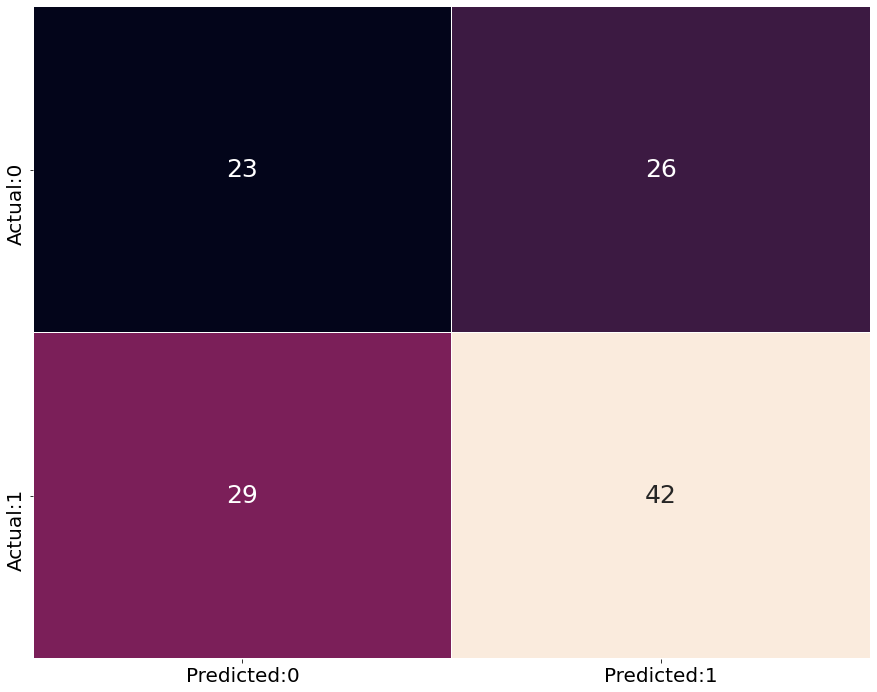

In [169]:
plot_confusion_matrix(gboost_model)

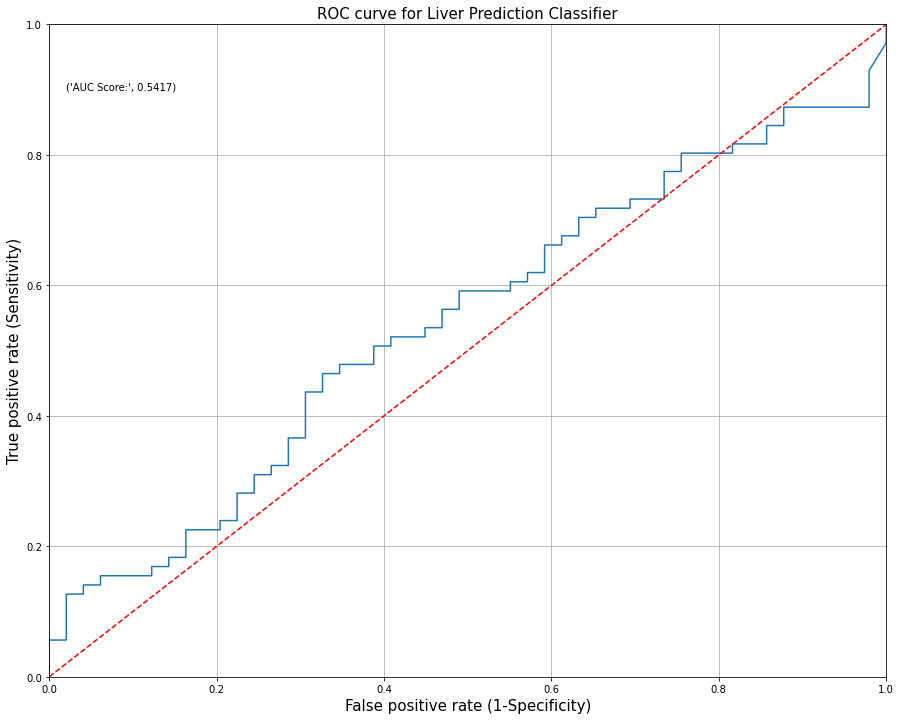

In [170]:
plot_roc(gboost_model)

**Interpretation:** From the above plot, we can see that our classifier (Gradient Boost with random parameters) is closer to the dotted line; with the AUC score 0.5417

## 2.2 Gradient Boosting with Best Parameters

### 2.2.1 Tune with GridSearchCV

In [57]:
tune_parameters = [{'n_estimators':[10,20,30,40,50], 'max_depth': range(2,15), 'learning_rate':[0.1,0.2,0.3,0.4,0.5]}]
gb_model = GradientBoostingClassifier(random_state=10)

gb_grid = GridSearchCV(estimator=gb_model, param_grid=tune_parameters, cv=4, scoring='roc_auc')
gb_grid.fit(X_train, y_train)
print("Best parameters for Gradient Bossting are:\n", gb_grid.best_params_,'\n')

Best parameters for Gradient Bossting are:
 {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 30} 



### 2.2.2 Build the Model with the Best Parameters

In [178]:
gboost_model = GradientBoostingClassifier(n_estimators = 30, learning_rate=0.1, max_depth = 8, random_state = 10)
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, n_estimators=30, random_state=10)

### 2.2.3 Compute the Performance of the Model

In [179]:
y_pred = gboost_model.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.57


In [180]:
print("Classification Train report: ")
train_report = get_train_report(gboost_model)
print(train_report)
print("Classification Test report: ")
test_report = get_test_report(gboost_model)
print(test_report)

Classification Train report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       174

    accuracy                           1.00       278
   macro avg       1.00      1.00      1.00       278
weighted avg       1.00      1.00      1.00       278

Classification Test report: 
              precision    recall  f1-score   support

           0       0.46      0.37      0.41        49
           1       0.62      0.70      0.66        71

    accuracy                           0.57       120
   macro avg       0.54      0.54      0.53       120
weighted avg       0.55      0.57      0.56       120



**Interpretation:** The train set has an accuracy of 100% while the test set has an accuracy of 57%. The difference between the test and train accuracy in the Model suggests severe overfitting.

### 2.2.4 Plot the Confusion Matrix and ROC Curve

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

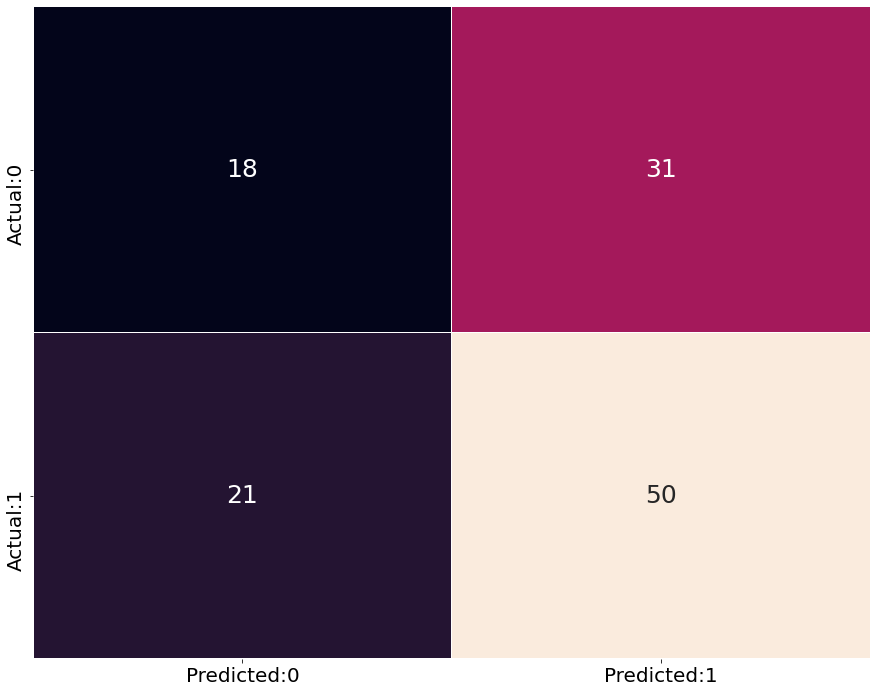

In [174]:
plot_confusion_matrix(gboost_model)

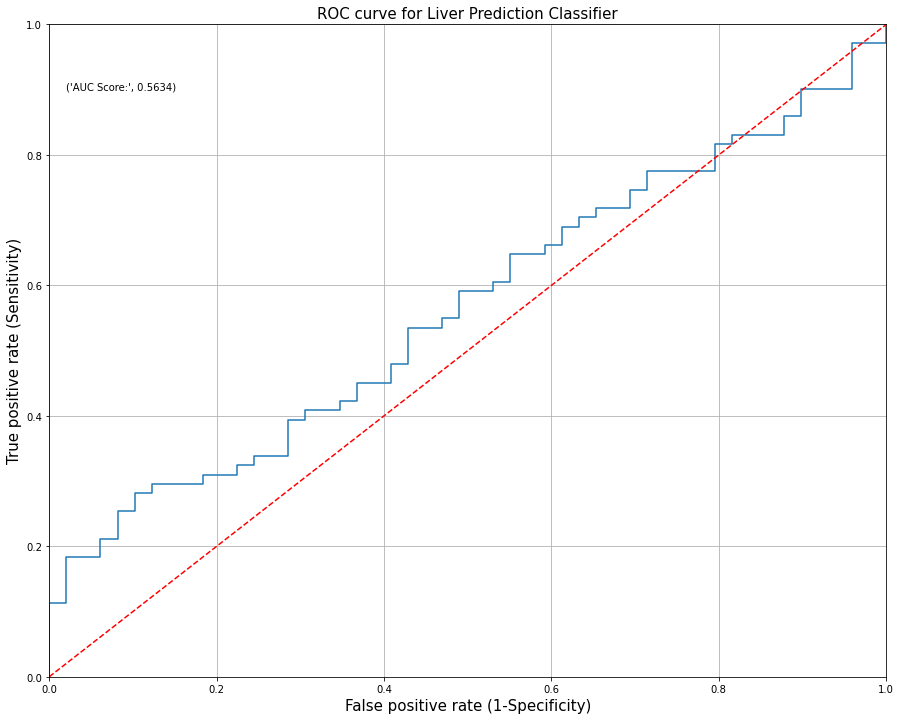

In [175]:
plot_roc(gboost_model)

**Interpretation:** From the above plot, we can see that our classifier (Gradient Boost with best parameters obtained from Tuning using GridSearchCV) is closer to the dotted line; with the AUC score 0.5634

====================================================================================================================

# 3. XGBoost

## 3.1 XGBoost with Random Parameters

### 3.1.1 Build the Model

In [181]:
xgb_model = XGBClassifier(max_depth = 10,learning_rate=0.3, gamma = 0, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

### 3.1.2 Compute the performance of the Model

In [183]:
y_pred = xgb_model.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.52


In [184]:
print("Classification Train report: ")
train_report = get_train_report(xgb_model)
print(train_report)
print("Classification Test report: ")
test_report = get_test_report(xgb_model)
print(test_report)

Classification Train report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       174

    accuracy                           1.00       278
   macro avg       1.00      1.00      1.00       278
weighted avg       1.00      1.00      1.00       278

Classification Test report: 
              precision    recall  f1-score   support

           0       0.40      0.39      0.40        49
           1       0.59      0.61      0.60        71

    accuracy                           0.52       120
   macro avg       0.50      0.50      0.50       120
weighted avg       0.51      0.52      0.51       120



**Interpretation:** The train set has an accuracy of 100% while the test set has an accuracy of 52%. The difference between the test and train accuracy in the Model suggests severe overfitting.

### 3.1.3 Plot the Confusion Matrix and ROC Curve of the Model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

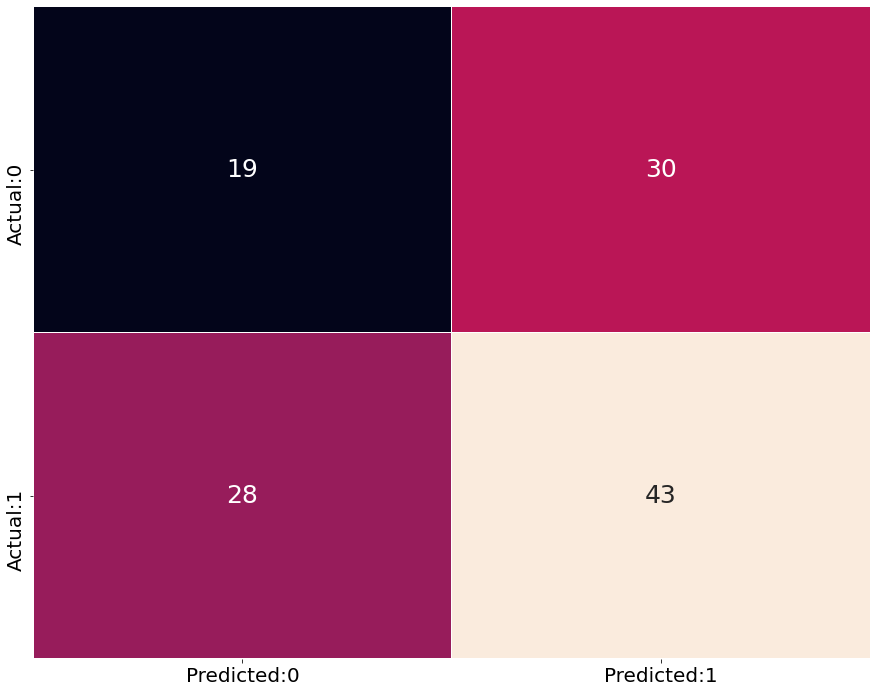

In [185]:
plot_confusion_matrix(xgb_model)

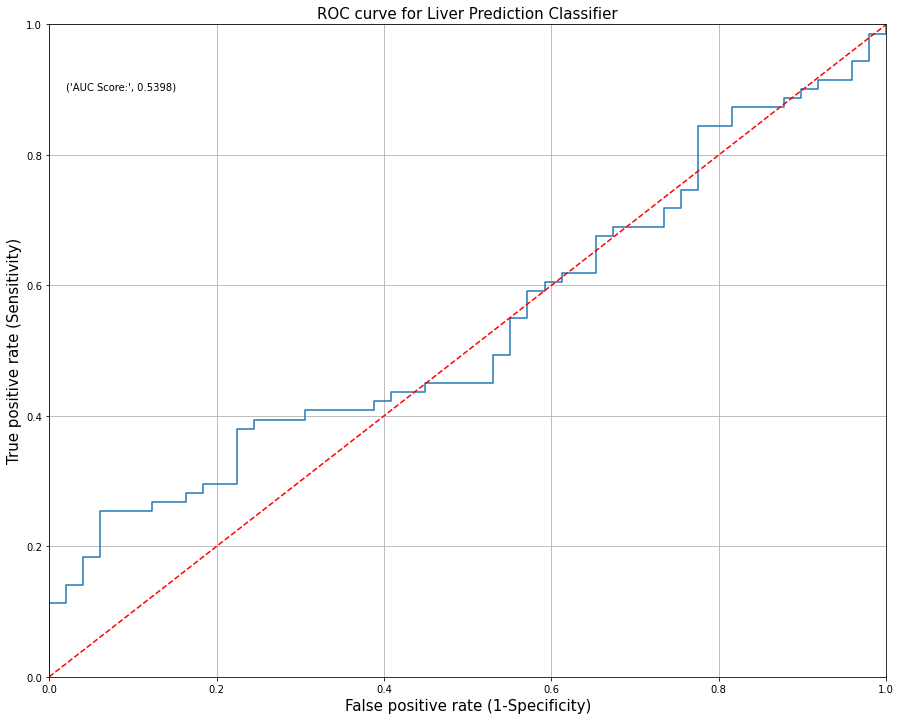

In [186]:
plot_roc(xgb_model)

**Interpretation:** From the above plot, we can see that our classifier (XGBoost with random parameters) is closer to the dotted line; with the AUC score 0.5398

## 3.2 XGBoost with Best Parameters

### 3.2.1 Tune with GridSearchCV

In [188]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': range(0,6)}

xgb_model = XGBClassifier(eval_metric='logloss',random_state=10)
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, 
                        cv = 3, scoring = 'roc_auc')
xgb_grid.fit(X_train, y_train)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 2, 'learning_rate': 0.4, 'max_depth': 6} 



### 3.2.2 Build the Model using the best parameters

In [189]:
xgb_model = XGBClassifier(max_depth = 6,learning_rate=0.4, gamma = 2, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=2, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

### 3.2.3 Compute the Performance of the Model

In [191]:
y_pred = xgb_model.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.54


In [192]:
print("Classification Train report: ")
train_report = get_train_report(xgb_model)
print(train_report)
print("Classification Test report: ")
test_report = get_test_report(xgb_model)
print(test_report)

Classification Train report: 
              precision    recall  f1-score   support

           0       0.97      0.87      0.91       104
           1       0.92      0.98      0.95       174

    accuracy                           0.94       278
   macro avg       0.95      0.92      0.93       278
weighted avg       0.94      0.94      0.94       278

Classification Test report: 
              precision    recall  f1-score   support

           0       0.42      0.35      0.38        49
           1       0.60      0.68      0.64        71

    accuracy                           0.54       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.53      0.54      0.53       120



**Interpretation:** The train set has an accuracy of 94% while the test set has an accuracy of 54%. The difference between the test and train accuracy in the Model suggests severe overfitting.

### 3.2.4 Plot the Confusion Matrix and ROC Curve of the Model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

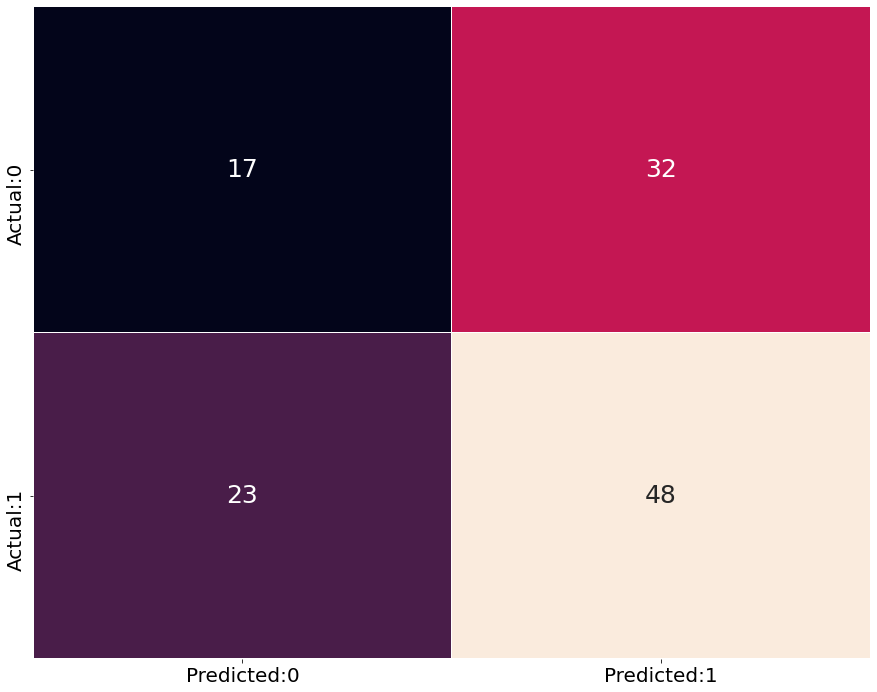

In [193]:
plot_confusion_matrix(xgb_model)

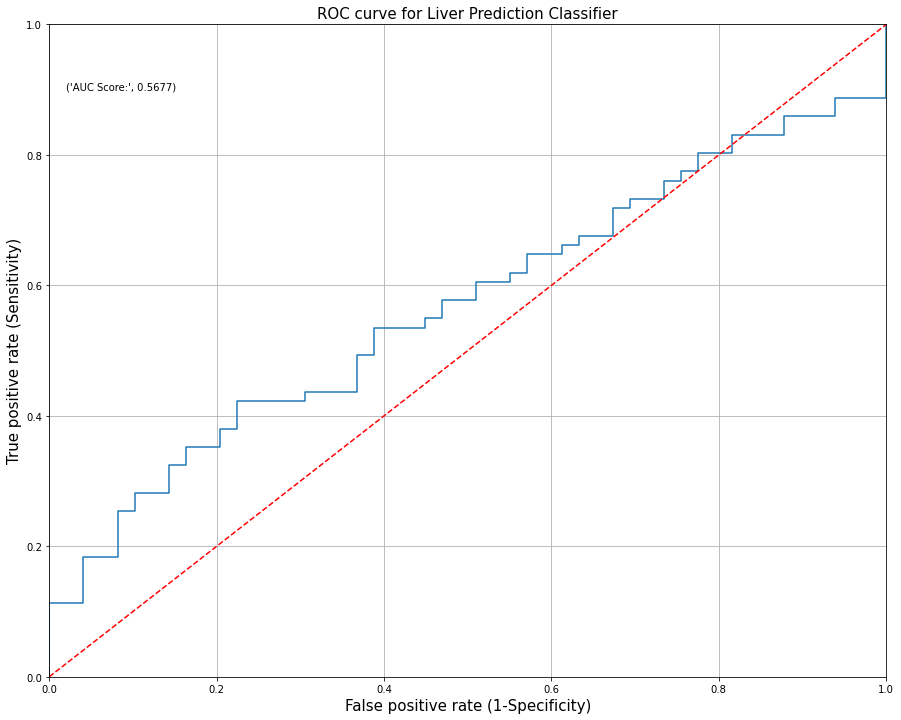

In [194]:
plot_roc(xgb_model)

**Interpretation:** From the above plot, we can see that our classifier (XGBoost with best parameters obtained from Tuning using GridSearchCV) is closer to the dotted line; with the AUC score 0.5677

### 3.2.5 Identify the Important Features using XGBoost

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

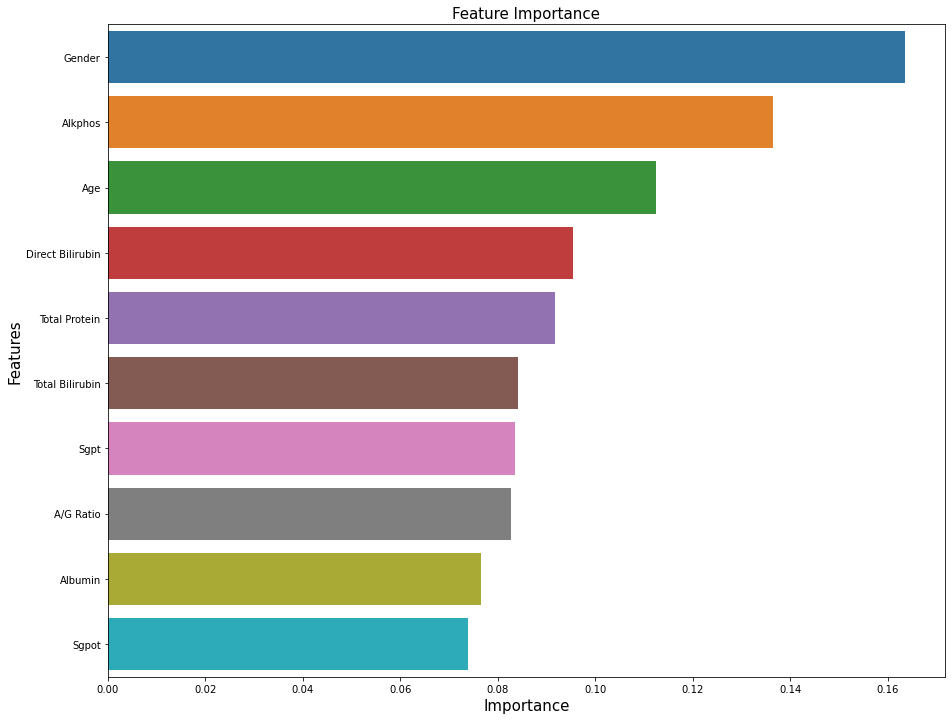

In [195]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

**Interpretation:** The above bar plot shows that, the variable `Gender` is of highest importance. 

=======================================================================================================================

# 4. Stack Generalization

## 4.1 Scale the Data

In [181]:
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(X)
X1 = pd.DataFrame(num_scaled, columns = X.columns)
X1.head()

<IPython.core.display.Javascript object>

,Age,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgpot,Total Protein,Albumin,A/G Ratio,Male
0,1.215707,-0.607419,-0.725068,-0.320525,-0.992871,-0.797009,0.267252,0.064154,-0.301147,-1.628305
1,0.795019,-0.255010,-0.101342,-0.394094,-1.108280,-0.728894,0.267252,0.196452,0.071309,0.614136
2,1.636395,3.151613,3.225193,-0.202814,-0.358118,0.599340,0.751176,-1.126524,-2.163429,0.614136
3,0.073839,0.684748,0.522383,-0.011534,-0.819756,-0.933238,1.041530,1.519428,1.188679,0.614136
4,-1.128127,-0.372479,-0.517159,-0.806081,-0.992871,-1.001352,0.460822,0.328750,0.071309,-1.628305


## 4.2 Splitting the Data

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (278, 10)
y_train (278,)
X_test (120, 10)
y_test (120,)


## 4.3 Build the stacking classifier using the Random forest, KNN and Naive Bayes as base learners (consider the hyperparameters tuned using GridSearchCV in the previous section).

In [183]:
base_learners = [('rf_model', RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt', 
                                           max_leaf_nodes= 11, min_samples_leaf= 2, min_samples_split= 2,
                                           n_estimators = 10, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'manhattan')),
                 ('NB_model', GaussianNB())]
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=5,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=11,
                                                       min_samples_leaf=2,
                                                       n_estimators=10,
                                                       random_state=10)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='manhattan',
                                                     n_neighbors=17)),
                               ('NB_model', GaussianNB())],
                   final_estimator=GaussianNB())

## 4.4 Computing the Performance of the Model

In [184]:
y_pred = stack_model.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.56


In [185]:
print("Classification Train report: ")
train_report = get_train_report(stack_model)
print(train_report)
print("Classification Test report: ")
test_report = get_test_report(stack_model)
print(test_report)

Classification Train report: 
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       104
           1       0.78      0.74      0.76       174

    accuracy                           0.71       278
   macro avg       0.69      0.69      0.69       278
weighted avg       0.71      0.71      0.71       278

Classification Test report: 
              precision    recall  f1-score   support

           0       0.45      0.41      0.43        49
           1       0.62      0.66      0.64        71

    accuracy                           0.56       120
   macro avg       0.54      0.54      0.53       120
weighted avg       0.55      0.56      0.55       120



**Interpretation:** The train set has an accuracy of 71% while the test set has an accuracy of 56%. The difference between the test and train accuracy in the Model suggests overfitting.

## 4.5 Plotting the Confusion Matrix and ROC Curve of the Model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

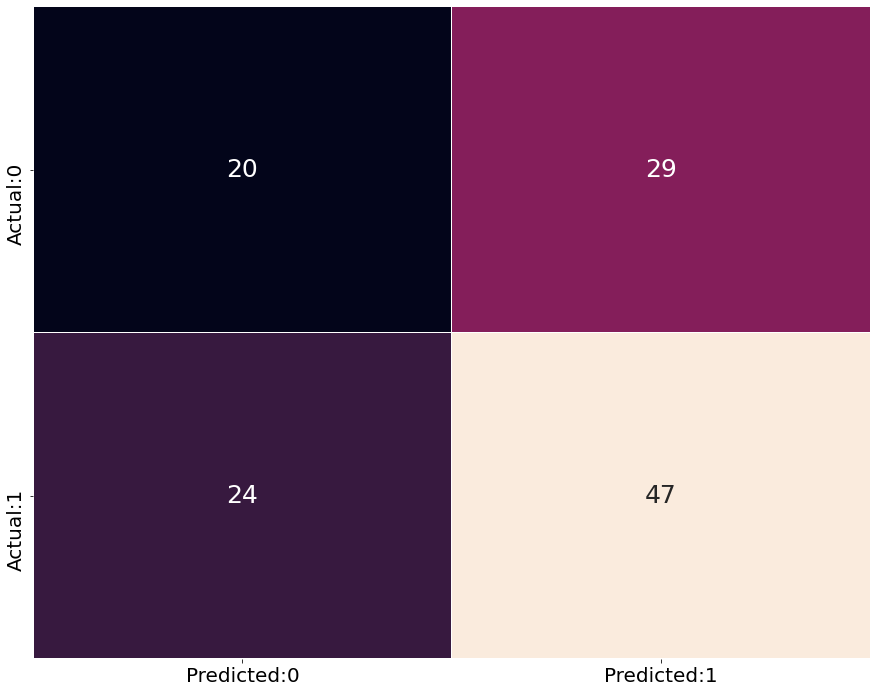

In [186]:
plot_confusion_matrix(stack_model)

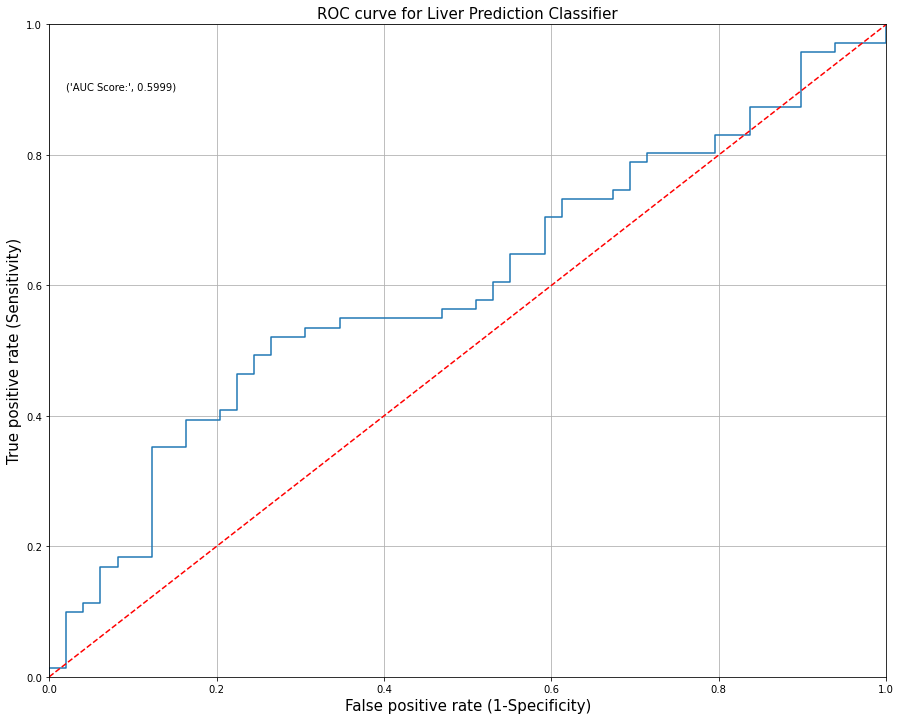

In [187]:
plot_roc(stack_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the stacking model is not away from the dotted line; with the AUC score 0.5999.

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

# 5. Light Gradient Boost

## 5.1 Build the Model

In [196]:
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_sm, y_sm)

LGBMClassifier()

## 5.2 Compute the Performance of the Model

In [197]:
y_pred = lgbm_model.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",round(acc,2))

Accuracy of the model:  0.54


In [198]:
print("Classification Train report: ")
train_report = get_train_report(lgbm_model)
print(train_report)
print("Classification Test report: ")
test_report = get_test_report(lgbm_model)
print(test_report)

Classification Train report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       174

    accuracy                           1.00       278
   macro avg       1.00      1.00      1.00       278
weighted avg       1.00      1.00      1.00       278

Classification Test report: 
              precision    recall  f1-score   support

           0       0.44      0.45      0.44        49
           1       0.61      0.61      0.61        71

    accuracy                           0.54       120
   macro avg       0.53      0.53      0.53       120
weighted avg       0.54      0.54      0.54       120



**Interpretation:** The train set has an accuracy of 100% while the test set has an accuracy of 54%. The difference between the test and train accuracy in the Model suggests severe overfitting.

## 5.3 Plot the Confusion Matrix and ROC Curve for the Model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

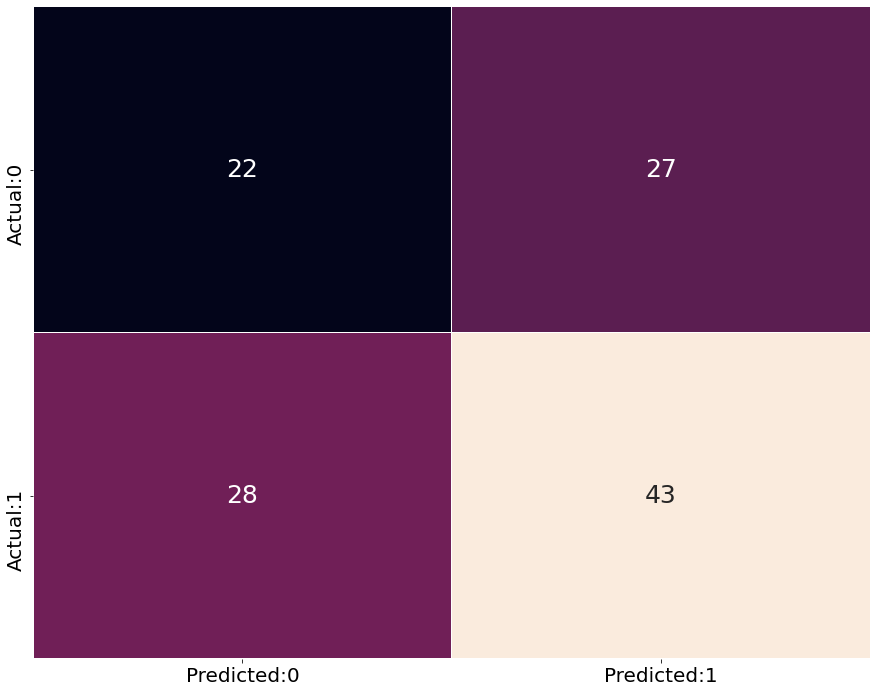

In [199]:
plot_confusion_matrix(lgbm_model)

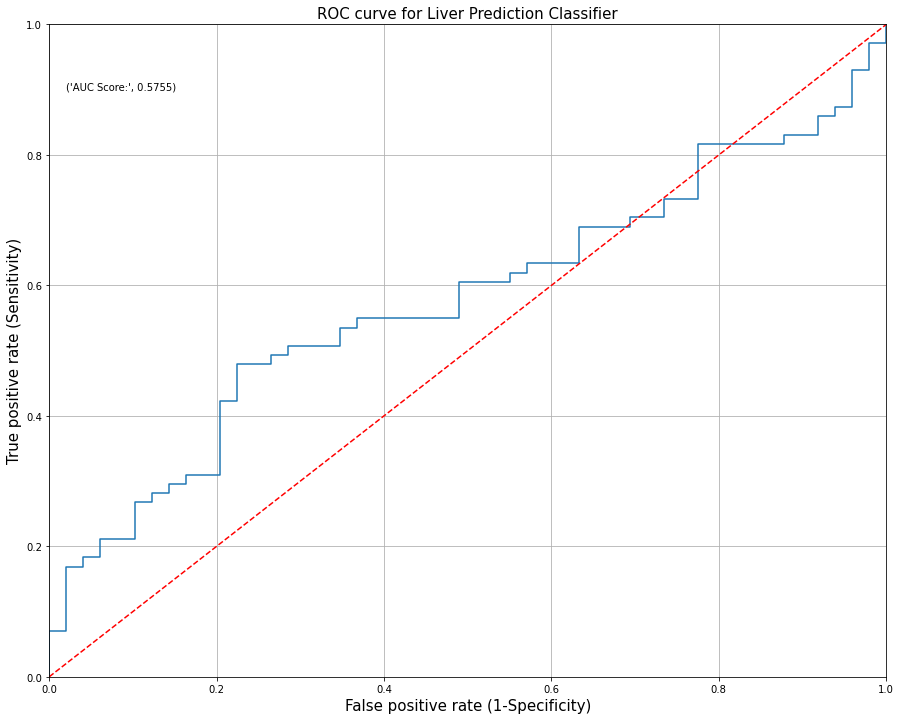

In [200]:
plot_roc(lgbm_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the stacking model is not away from the dotted line; with the AUC score 0.5755

========================================================================================================================

# 6. Feature Selection

## 6.1 Run the Variables through the RandomClassifier to find the best features.

In [175]:
sel = SelectFromModel(RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt', 
                                           max_leaf_nodes= 11, min_samples_leaf= 2, min_samples_split= 2,
                                           n_estimators = 10, random_state = 10), threshold=0.08)
sel.fit(X_sm, y_sm)

SelectFromModel(estimator=RandomForestClassifier(criterion='entropy',
                                                 max_depth=5,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=11,
                                                 min_samples_leaf=2,
                                                 n_estimators=10,
                                                 random_state=10),
                threshold=0.08)

## 6.2 Select the best features of the Data.

In [176]:
sel.get_support()
selected_feat= X_sm.columns[(sel.get_support(indices=True))]
len(selected_feat)

5

In [180]:
X_features=pd.DataFrame(selected_feat,columns=['Best Features'],index=['','','','',''])
X_features

<IPython.core.display.Javascript object>

,Best Features
,Age
,Alkphos
,Total Protein
,Albumin
,A/G Ratio


**Interpretation:** From the Feature Selections we find out that Age, Alkphos, Total Protetin, Albumin and A/G Ratio are the best features for the Prediction of a Liver Patient.

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

<a id="con"></a>
# F. CONCLUSION

In this Paper,  we have studied and analyzed the Liver Patient Classifiers.By using various techniques the data has been cleaned by imputation of missing values with median, then dummy encoding is applied followed by outlier eliminated to improve the performance. In this research paper, various classification algorithm have been applied such as Logistic regression, Decision Tree, Random Forest, KNNeighbor, Gradient Boosting, Extreme Gradient Boosting, LightGB.
Based on algorithms applied, it was observed that models while most of the Algorithms gave a test accuracy within a range of 54 to 58%, most of them showed signs of severe over-fitting. The Naive Baye's Algorithm there gave the best fit-model with a train and test accuracy close to each other of 55% and 54% respectively, hence opting for it would give us the best predictions of the Liver Patient.
While Naive Baye's gave us the best fit, Logistic Regression gave us the odds of each variable impacting the prediction of a Liver Patient Cancer, A/G Ratio having the biggest odds of impacting the Prediction of a Liver Patient Classification.